now working /home/ken/src/github.com/endaaman/bt



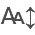

In [1]:
import os
import re
import sys

import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics as skmetrics
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import fontManager
from IPython.display import display
from ipywidgets import interact, FloatSlider
from umap import UMAP
from sklearn.decomposition import PCA
import ipynbname
from endaaman.ml import fix_global_seed
from itables import init_notebook_mode
# from ydata_profiling import ProfileReport

project_root = os.path.abspath(os.path.join(os.path.dirname(ipynbname.path()), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
os.chdir(project_root)
print('now working', project_root)

DPI = 300

sns.set_theme(style="ticks", palette="tab10")
# sns.set_theme(style="white")
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['font.size'] = 10  
plt.rcParams['axes.labelsize'] = 12  
plt.rcParams['axes.titlesize'] = 14  
plt.rcParams['xtick.labelsize'] = 10  
plt.rcParams['ytick.labelsize'] = 10 
plt.rcParams['figure.dpi'] = DPI

os.makedirs('out/figs', exist_ok=True)

fix_global_seed()

init_notebook_mode(all_interactive=True)
# print(f"デフォルトのフォント: {plt.rcParams['font.sans-serif']}")
# print(', '.join(sorted(list(set([font.name for font in fontManager.ttflist if not font.name.startswith('Noto')])))))

LIMIT = 500

## Table2: Cross Validation

In [2]:
mm = [
    'Recall', 
    'Accuracy(Patch)', 
    'Accuracy', 
    'F1 score', 
    'G Recall', 
    'A Recall', 
    'O Recall', 
    'M Recall', 
    'L Recall', 
]

skip_when_coarse = ['A Recall', 'O Recall']

def dump_to_table(target, coarse=False, result_limit=100):
    r = None
    error_type = 'ci'
    grains = 'coarse' if coarse else 'fine'
    P = f'out/tables/score_{grains}_{target}.xlsx'
    with pd.ExcelWriter(P) as w:
        for limit in [500, 10, 25, 100]:
            df = pd.read_excel(f'out/tables/results_{grains}_{target}.xlsx', sheet_name=f'{limit}', index_col=0)
            data = []
            labels = df['label'].unique()
            for l in labels:
                vvv = df[df['label'] == l]
                ss = {}
                for m in mm:
                    if coarse and m in skip_when_coarse:
                        continue
                    vv = vvv[m].values
                    mean = np.mean(vv)
                    if len(vv) > 0 and vv.std() > 0:
                        if error_type == 'ci':
                            ci = stats.t.interval(confidence=0.95, df=len(vv)-1, loc=mean, scale=stats.sem(vv))
                            error = (ci[1] - ci[0])/2
                        else:
                            error = stats.sem(vv)
                    else:
                        error = 0.0
                    s = '{:.3f} ± {:.3f}'.format(mean, error)
                    ss[m] = s
                data.append(ss)
            df2 = pd.DataFrame(data, index=labels)
            df2.to_excel(w, sheet_name=f'{limit}')
            w.sheets[f'{limit}'].set_column('A:A', 30)
            w.sheets[f'{limit}'].set_column('B:Z', 12)
            if limit == result_limit:
                print(f'return {result_limit}')
                r = df2
    print(f'wrote {P}')
    return r 

## Table2: Local cross-validation

In [3]:
dump_to_table('cv', False, LIMIT)

return 500
wrote out/figs/table2_fine_cv.xlsx


Recall Accuracy(Patch)  \
Prov-GigaPath(LP)                 0.881 ± 0.100   0.931 ± 0.024   
UNI(FT)                           0.866 ± 0.072   0.936 ± 0.015   
UNI(LP)                           0.883 ± 0.093   0.929 ± 0.026   
CTransPath(FT)                    0.879 ± 0.091   0.921 ± 0.022   
CTransPath(LP)                    0.870 ± 0.065   0.901 ± 0.026   
VIT-L$\mathrm{_{IN}}$(FT)         0.833 ± 0.084   0.913 ± 0.023   
VIT-L$\mathrm{_{IN}}$(LP)         0.829 ± 0.045   0.861 ± 0.031   
VIT-L(RI)                         0.827 ± 0.042   0.858 ± 0.019   
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.853 ± 0.101   0.914 ± 0.016   
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.355 ± 0.069   0.377 ± 0.090   

                                       Accuracy       F1 score       G Recall  \
Prov-GigaPath(LP)                 0.949 ± 0.040  0.881 ± 0.097  0.954 ± 0.052   
UNI(FT)                           0.942 ± 0.033  0.861 ± 0.085  0.985 ± 0.043   
UNI(LP)                           0.949 ± 0.042  0.885 ± 0.095  0.969 ± 0.052   
CTransPath(FT)                    0.947 ± 0.042  0.876 ± 0.094  0.969 ± 0.052   
CTransPath(LP)                    0.939 ± 0.017  0.866 ± 0.050  0.938 ± 0.125   
VIT-L$\mathrm{_{IN}}$(FT)         0.927 ± 0.028  0.833 ± 0.086  0.954 ± 0.085   
VIT-L$\mathrm{_{IN}}$(LP)         0.907 ± 0.024  0.826 ± 0.055  0.847 ± 0.192   
VIT-L(RI)                         0.901 ± 0.029  0.833 ± 0.046  0.924 ± 0.068   
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.937 ± 0.037  0.845 ± 0.109  0.985 ± 0.043   
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.369 ± 0.119  0.233 ± 0.064  0.000 ± 0.000   

                                       A Recall       O Recall       M Recall  \
Prov-GigaPath(LP)                 0.527 ± 0.459  0.820 ± 0.254  0.988 ± 0.035   
UNI(FT)                           0.387 ± 0.353  0.870 ± 0.150  0.976 ± 0.041   
UNI(LP)                           0.493 ± 0.425  0.870 ± 0.150  0.988 ± 0.035   
CTransPath(FT)                    0.460 ± 0.408  0.870 ± 0.150  0.976 ± 0.041   
CTransPath(LP)                    0.467 ± 0.384  0.870 ± 0.150  0.988 ± 0.035   
VIT-L$\mathrm{_{IN}}$(FT)         0.340 ± 0.299  0.750 ± 0.271  0.975 ± 0.069   
VIT-L$\mathrm{_{IN}}$(LP)         0.387 ± 0.251  0.870 ± 0.150  0.951 ± 0.065   
VIT-L(RI)                         0.580 ± 0.309  0.710 ± 0.374  0.902 ± 0.084   
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.347 ± 0.508  0.830 ± 0.121  0.975 ± 0.043   
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.000 ± 0.000  0.920 ± 0.136  0.000 ± 0.000   

                                       L Recall  
Prov-GigaPath(LP)                 1.000 ± 0.000  
UNI(FT)                           0.980 ± 0.056  
UNI(LP)                           0.980 ± 0.056  
CTransPath(FT)                    1.000 ± 0.000  
CTransPath(LP)                    0.960 ± 0.068  
VIT-L$\mathrm{_{IN}}$(FT)         0.980 ± 0.056  
VIT-L$\mathrm{_{IN}}$(LP)         0.922 ± 0.103  
VIT-L(RI)                         0.844 ± 0.109  
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.980 ± 0.056  
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.569 ± 0.356

In [4]:
dump_to_table('ebrains', False, LIMIT)

return 500
wrote out/figs/table2_fine_ebrains.xlsx


Recall Accuracy(Patch)  \
Prov-GigaPath(LP)                 0.729 ± 0.006   0.644 ± 0.012   
UNI(FT)                           0.708 ± 0.024   0.636 ± 0.019   
UNI(LP)                           0.750 ± 0.007   0.653 ± 0.015   
CTransPath(FT)                    0.678 ± 0.011   0.594 ± 0.034   
CTransPath(LP)                    0.692 ± 0.011   0.590 ± 0.014   
VIT-L$\mathrm{_{IN}}$(FT)         0.636 ± 0.024   0.559 ± 0.039   
VIT-L$\mathrm{_{IN}}$(LP)         0.641 ± 0.025   0.526 ± 0.043   
VIT-L(RI)                         0.538 ± 0.040   0.436 ± 0.051   
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.621 ± 0.025   0.538 ± 0.033   
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.288 ± 0.038   0.127 ± 0.036   

                                       Accuracy       F1 score       G Recall  \
Prov-GigaPath(LP)                 0.665 ± 0.017  0.671 ± 0.018  0.735 ± 0.043   
UNI(FT)                           0.651 ± 0.028  0.641 ± 0.041  0.757 ± 0.031   
UNI(LP)                           0.682 ± 0.011  0.699 ± 0.015  0.734 ± 0.069   
CTransPath(FT)                    0.611 ± 0.025  0.616 ± 0.025  0.712 ± 0.061   
CTransPath(LP)                    0.623 ± 0.013  0.637 ± 0.013  0.683 ± 0.035   
VIT-L$\mathrm{_{IN}}$(FT)         0.579 ± 0.030  0.560 ± 0.038  0.743 ± 0.092   
VIT-L$\mathrm{_{IN}}$(LP)         0.575 ± 0.036  0.546 ± 0.041  0.691 ± 0.112   
VIT-L(RI)                         0.471 ± 0.062  0.452 ± 0.059  0.581 ± 0.123   
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.556 ± 0.037  0.544 ± 0.047  0.699 ± 0.086   
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.274 ± 0.017  0.171 ± 0.033  0.005 ± 0.004   

                                       A Recall       O Recall       M Recall  \
Prov-GigaPath(LP)                 0.609 ± 0.060  0.450 ± 0.045  0.902 ± 0.024   
UNI(FT)                           0.336 ± 0.108  0.594 ± 0.129  0.889 ± 0.012   
UNI(LP)                           0.592 ± 0.063  0.518 ± 0.051  0.949 ± 0.014   
CTransPath(FT)                    0.444 ± 0.052  0.419 ± 0.057  0.877 ± 0.043   
CTransPath(LP)                    0.579 ± 0.082  0.408 ± 0.079  0.885 ± 0.014   
VIT-L$\mathrm{_{IN}}$(FT)         0.269 ± 0.108  0.419 ± 0.096  0.855 ± 0.051   
VIT-L$\mathrm{_{IN}}$(LP)         0.413 ± 0.224  0.365 ± 0.257  0.864 ± 0.069   
VIT-L(RI)                         0.272 ± 0.094  0.295 ± 0.091  0.749 ± 0.051   
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.260 ± 0.091  0.403 ± 0.064  0.843 ± 0.030   
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.086 ± 0.134  0.833 ± 0.123  0.000 ± 0.000   

                                       L Recall  
Prov-GigaPath(LP)                 0.949 ± 0.000  
UNI(FT)                           0.963 ± 0.009  
UNI(LP)                           0.956 ± 0.019  
CTransPath(FT)                    0.939 ± 0.019  
CTransPath(LP)                    0.905 ± 0.038  
VIT-L$\mathrm{_{IN}}$(FT)         0.895 ± 0.040  
VIT-L$\mathrm{_{IN}}$(LP)         0.871 ± 0.035  
VIT-L(RI)                         0.793 ± 0.089  
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.902 ± 0.056  
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.515 ± 0.216

## Table2: EBRAINS

In [6]:
dump_to_table('cv', True, LIMIT)

return 500
wrote out/figs/table2_coarse_cv.xlsx


Recall Accuracy(Patch)  \
Prov-GigaPath(LP)                 0.992 ± 0.014   0.972 ± 0.014   
UNI(FT)                           0.987 ± 0.016   0.974 ± 0.012   
UNI(LP)                           0.987 ± 0.016   0.972 ± 0.015   
CTransPath(FT)                    0.989 ± 0.018   0.962 ± 0.014   
CTransPath(LP)                    0.980 ± 0.017   0.948 ± 0.013   
VIT-L$\mathrm{_{IN}}$(FT)         0.982 ± 0.015   0.954 ± 0.017   
VIT-L$\mathrm{_{IN}}$(LP)         0.944 ± 0.022   0.909 ± 0.018   
VIT-L(RI)                         0.926 ± 0.039   0.911 ± 0.017   
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.987 ± 0.011   0.956 ± 0.011   
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.499 ± 0.087   0.516 ± 0.060   

                                       Accuracy       F1 score       G Recall  \
Prov-GigaPath(LP)                 0.992 ± 0.014  0.991 ± 0.016  0.982 ± 0.030   
UNI(FT)                           0.990 ± 0.013  0.986 ± 0.016  0.991 ± 0.024   
UNI(LP)                           0.990 ± 0.013  0.988 ± 0.016  0.982 ± 0.030   
CTransPath(FT)                    0.990 ± 0.017  0.987 ± 0.023  0.982 ± 0.030   
CTransPath(LP)                    0.985 ± 0.013  0.983 ± 0.015  0.974 ± 0.047   
VIT-L$\mathrm{_{IN}}$(FT)         0.985 ± 0.013  0.981 ± 0.015  0.974 ± 0.049   
VIT-L$\mathrm{_{IN}}$(LP)         0.952 ± 0.021  0.939 ± 0.025  0.905 ± 0.097   
VIT-L(RI)                         0.947 ± 0.026  0.935 ± 0.036  0.957 ± 0.002   
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.990 ± 0.007  0.988 ± 0.009  0.991 ± 0.024   
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.543 ± 0.084  0.439 ± 0.084  0.784 ± 0.188   

                                       M Recall       L Recall  
Prov-GigaPath(LP)                 0.988 ± 0.035  1.000 ± 0.000  
UNI(FT)                           0.976 ± 0.041  0.980 ± 0.056  
UNI(LP)                           0.988 ± 0.035  0.980 ± 0.056  
CTransPath(FT)                    0.976 ± 0.041  1.000 ± 0.000  
CTransPath(LP)                    0.988 ± 0.035  0.960 ± 0.068  
VIT-L$\mathrm{_{IN}}$(FT)         0.975 ± 0.069  0.980 ± 0.056  
VIT-L$\mathrm{_{IN}}$(LP)         0.951 ± 0.065  0.922 ± 0.103  
VIT-L(RI)                         0.902 ± 0.084  0.844 ± 0.109  
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.975 ± 0.043  0.980 ± 0.056  
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.000 ± 0.000  0.569 ± 0.356

In [7]:
dump_to_table('ebrains', True, LIMIT)

return 500
wrote out/figs/table2_coarse_ebrains.xlsx


Recall Accuracy(Patch)  \
Prov-GigaPath(LP)                 0.918 ± 0.005   0.878 ± 0.015   
UNI(FT)                           0.910 ± 0.020   0.866 ± 0.039   
UNI(LP)                           0.941 ± 0.009   0.897 ± 0.016   
CTransPath(FT)                    0.900 ± 0.010   0.858 ± 0.031   
CTransPath(LP)                    0.899 ± 0.010   0.851 ± 0.024   
VIT-L$\mathrm{_{IN}}$(FT)         0.866 ± 0.022   0.806 ± 0.050   
VIT-L$\mathrm{_{IN}}$(LP)         0.842 ± 0.017   0.744 ± 0.047   
VIT-L(RI)                         0.765 ± 0.034   0.690 ± 0.063   
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.858 ± 0.013   0.795 ± 0.032   
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.452 ± 0.043   0.465 ± 0.165   

                                       Accuracy       F1 score       G Recall  \
Prov-GigaPath(LP)                 0.906 ± 0.012  0.808 ± 0.018  0.902 ± 0.016   
UNI(FT)                           0.885 ± 0.042  0.783 ± 0.057  0.877 ± 0.049   
UNI(LP)                           0.925 ± 0.019  0.844 ± 0.030  0.920 ± 0.023   
CTransPath(FT)                    0.889 ± 0.019  0.780 ± 0.022  0.885 ± 0.026   
CTransPath(LP)                    0.904 ± 0.019  0.797 ± 0.028  0.905 ± 0.023   
VIT-L$\mathrm{_{IN}}$(FT)         0.851 ± 0.045  0.726 ± 0.053  0.847 ± 0.057   
VIT-L$\mathrm{_{IN}}$(LP)         0.802 ± 0.033  0.674 ± 0.034  0.790 ± 0.044   
VIT-L(RI)                         0.755 ± 0.077  0.608 ± 0.066  0.752 ± 0.092   
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.838 ± 0.035  0.714 ± 0.045  0.831 ± 0.043   
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.758 ± 0.068  0.390 ± 0.020  0.842 ± 0.099   

                                       M Recall       L Recall  
Prov-GigaPath(LP)                 0.902 ± 0.024  0.949 ± 0.000  
UNI(FT)                           0.889 ± 0.012  0.963 ± 0.009  
UNI(LP)                           0.949 ± 0.014  0.956 ± 0.019  
CTransPath(FT)                    0.877 ± 0.043  0.939 ± 0.019  
CTransPath(LP)                    0.885 ± 0.014  0.905 ± 0.038  
VIT-L$\mathrm{_{IN}}$(FT)         0.855 ± 0.051  0.895 ± 0.040  
VIT-L$\mathrm{_{IN}}$(LP)         0.864 ± 0.069  0.871 ± 0.035  
VIT-L(RI)                         0.749 ± 0.051  0.793 ± 0.089  
ResNet-RS 50$\mathrm{_{IN}}$(FT)  0.843 ± 0.030  0.902 ± 0.056  
ResNet-RS 50$\mathrm{_{IN}}$(LP)  0.000 ± 0.000  0.515 ± 0.216

## fig3: Box - Cross Validation

In [9]:
import random
import colorcet as cc

labels = [
    'Prov-GigaPath(LP)',
    'UNI(FT)',
    'UNI(LP)',
    'CTransPath(FT)',
    'CTransPath(LP)',
    r'VIT-L$\mathrm{_{IN}}$(FT)',
    r'VIT-L$\mathrm{_{IN}}$(LP)',
    r'VIT-L(RI)',
    r'ResNet-RS 50$\mathrm{_{IN}}$(FT)',
    r'ResNet-RS 50$\mathrm{_{IN}}$(LP)',
    r'ResNet-RS 50(RI)',
]
print(len(labels))
# colors = sns.color_palette('pastel20', len(label))
colors = sns.color_palette(cc.glasbey_hv, n_colors=len(labels))
color_map = dict(zip(labels, colors))
display(colors)

11


[(0.18824, 0.63529, 0.85490),
 (0.98823, 0.30980, 0.18824),
 (0.89804, 0.68235, 0.21961),
 (0.42745, 0.56471, 0.30980),
 (0.54510, 0.54510, 0.54510),
 (0.09020, 0.74510, 0.81176),
 (0.58039, 0.40392, 0.74118),
 (0.83922, 0.15294, 0.15686),
 (0.12157, 0.46667, 0.70588),
 (0.89020, 0.46667, 0.76078),
 (0.54902, 0.33726, 0.29412)]

In [10]:
from statsmodels.stats.multitest import multipletests

verbose = False

def paired_box(target:str, 
               coarse:bool, 
               limit:int, 
               key:str, 
               show:bool=False, 
               excludes=['frozen_baseline-cnn'],
               sort=False,
               mean=False,
               log_scale=False,
              ):
    grains = 'coarse' if coarse else 'fine'
    key_map = {
        'pacc': 'Accuracy(Patch)',
        'recall': 'Recall',
        'acc': 'Accuracy',
        'f1': 'F1 score',
    }
    key_label = key_map[key]
    
    df = pd.read_excel(f'out/figs/results_{grains}_{target}.xlsx', sheet_name=f'{limit}', index_col=0)    
    for e in excludes:
        df = df[~df['cond'].str.startswith(e)]
    labels = list(df['label'].unique())

    n_folds, n_models = 5, len(df)//5

    df_mean = df.groupby('cond')[key_label].mean().sort_values(ascending=True)
    df[f'average_{key}'] = df['cond'].map(df_mean)
    if sort:
        df = df.sort_values([f'average_{key}', 'fold'], ascending=[True, True])
    else:
        df = df[::-1]    
    labels_sorted = df['label'].unique()

    # Create figure with GridSpec
    fig = plt.figure(figsize=(8, 10))
    gs = fig.add_gridspec(2, 2, width_ratios=[20, 1], height_ratios=[3, 1], hspace=0.5, wspace=0.2)

    # Create axes
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    cax = fig.add_subplot(gs[1, 1])

    # Box plot
    
    sns.boxplot(x='label', hue='label', y=key_label, data=df, legend=True, palette=[color_map[label] for label in labels_sorted], ax=ax1)

    # Connect folds with lines
    for fold in range(n_folds):
        fold_data = df[df['fold'] == fold]
        ax1.plot(range(n_models), fold_data[key_label], 'k-', alpha=0.3, linewidth=0.5)
    
    # Scatter individual points
    for i, label in enumerate(labels_sorted):
        ax1.scatter([i] * n_folds, df[df['label'] == label][key_label], color='black', s=10, zorder=3)
    
    # Plot mean
    if mean:
        ax1.plot(range(n_models), df_mean, 'firebrick', linewidth=1, zorder=4, alpha=0.4)

    mean_scatter = ax1.scatter(
        labels, 
        [df[df['label'] == l][key_label].mean() for l in labels],
        color='firebrick', s=50, zorder=5, label='Mean', alpha=0.7)

    # Set ax1 properties
    target_dataset = {
        'cv': 'Local',
        'ebrains': 'EBRAINS',
    }[target]
    ax1.set_title(f'{target_dataset} - {key_label}')
    ax1.set_xticks(range(len(labels_sorted)))
    ax1.set_xticklabels(labels_sorted, rotation=45, ha='right')
    ax1.set_xlabel('')
    ax1.set_ylabel(key_label)


    # Calculate p-values
    p_values = []
    for i in range(n_models):
        for j in range(i+1, n_models):
            a = df[df['label']==labels_sorted[i]][key_label]
            b = df[df['label']==labels_sorted[j]][key_label]
            t_stat, p_value = stats.ttest_rel(a, b)
            p_values.append(p_value)

    # Benjamini-Hochberg correction
    _, p_values, _, _ = multipletests(p_values, method='fdr_bh')


    # Create significance matrix
    sig_matrix = np.zeros((n_models, n_models))
    k = 0
    for i in range(n_models):
        for j in range(i+1, n_models):
            sig_matrix[j, i] = -np.log10(p_values[k]) if log_scale else p_values[k]
            k += 1

    # Create mask for lower triangle
    mask = np.triu(np.ones_like(sig_matrix, dtype=bool), k=0)

    # Heatmap

    
    V = {'vmin': 0, 'vmax': 3, 'cmap': 'YlOrRd'} if log_scale else {'vmin': 0, 'vmax': 0.1, 'cmap': 'YlOrRd_r'}
    heatmap = sns.heatmap(sig_matrix, mask=mask, annot=True, fmt='.4f', 
                          ax=ax2, cbar_ax=cax, cbar_kws={'label': '-log10(p-value)'}, **V)
    for text in ax2.texts:
        text.set_fontsize(6)


    # Set ax2 properties
    ax2.set_xticklabels(labels_sorted, rotation=45, ha='right')
    ax2.set_yticklabels(labels_sorted, rotation=0)
    ax2.set_title('-log10(p-value)')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('Model')

    # handles, labels = ax1.get_legend_handles_labels()
    # handles = handles[:-1][::-1] + [handles[-1]]
    # labels = labels[:-1][::-1] + [labels[-1]]
    # ax1.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    handles, _labels = ax1.get_legend_handles_labels()
    legend_labels = labels
    legend_handles = []
    for i, l in enumerate(labels):
        o = _labels.index(l)
        legend_handles.append(handles[o])
    if mean:
        legend_labels += ['Mean']
        legend_handles += [mean_scatter]
    ax1.legend(legend_handles, legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.subplots_adjust(left=0.30, right=0.70, top=0.95, bottom=0.15)

    print(f'{target} - {grains} - {limit} - {key}')
    fig_path = f'out/figs/box_{target}_{grains}_{limit}_{key}.png'
    plt.savefig(fig_path, format='png', dpi=DPI)
    print(f'saved {fig_path}')
    if show:
        plt.show()
    plt.close()

## CV 500 coarse patches/case

## EBRAINS 500 coarse patches/case

cv - fine - 500 - pacc
saved out/figs/box_cv_fine_500_pacc.png


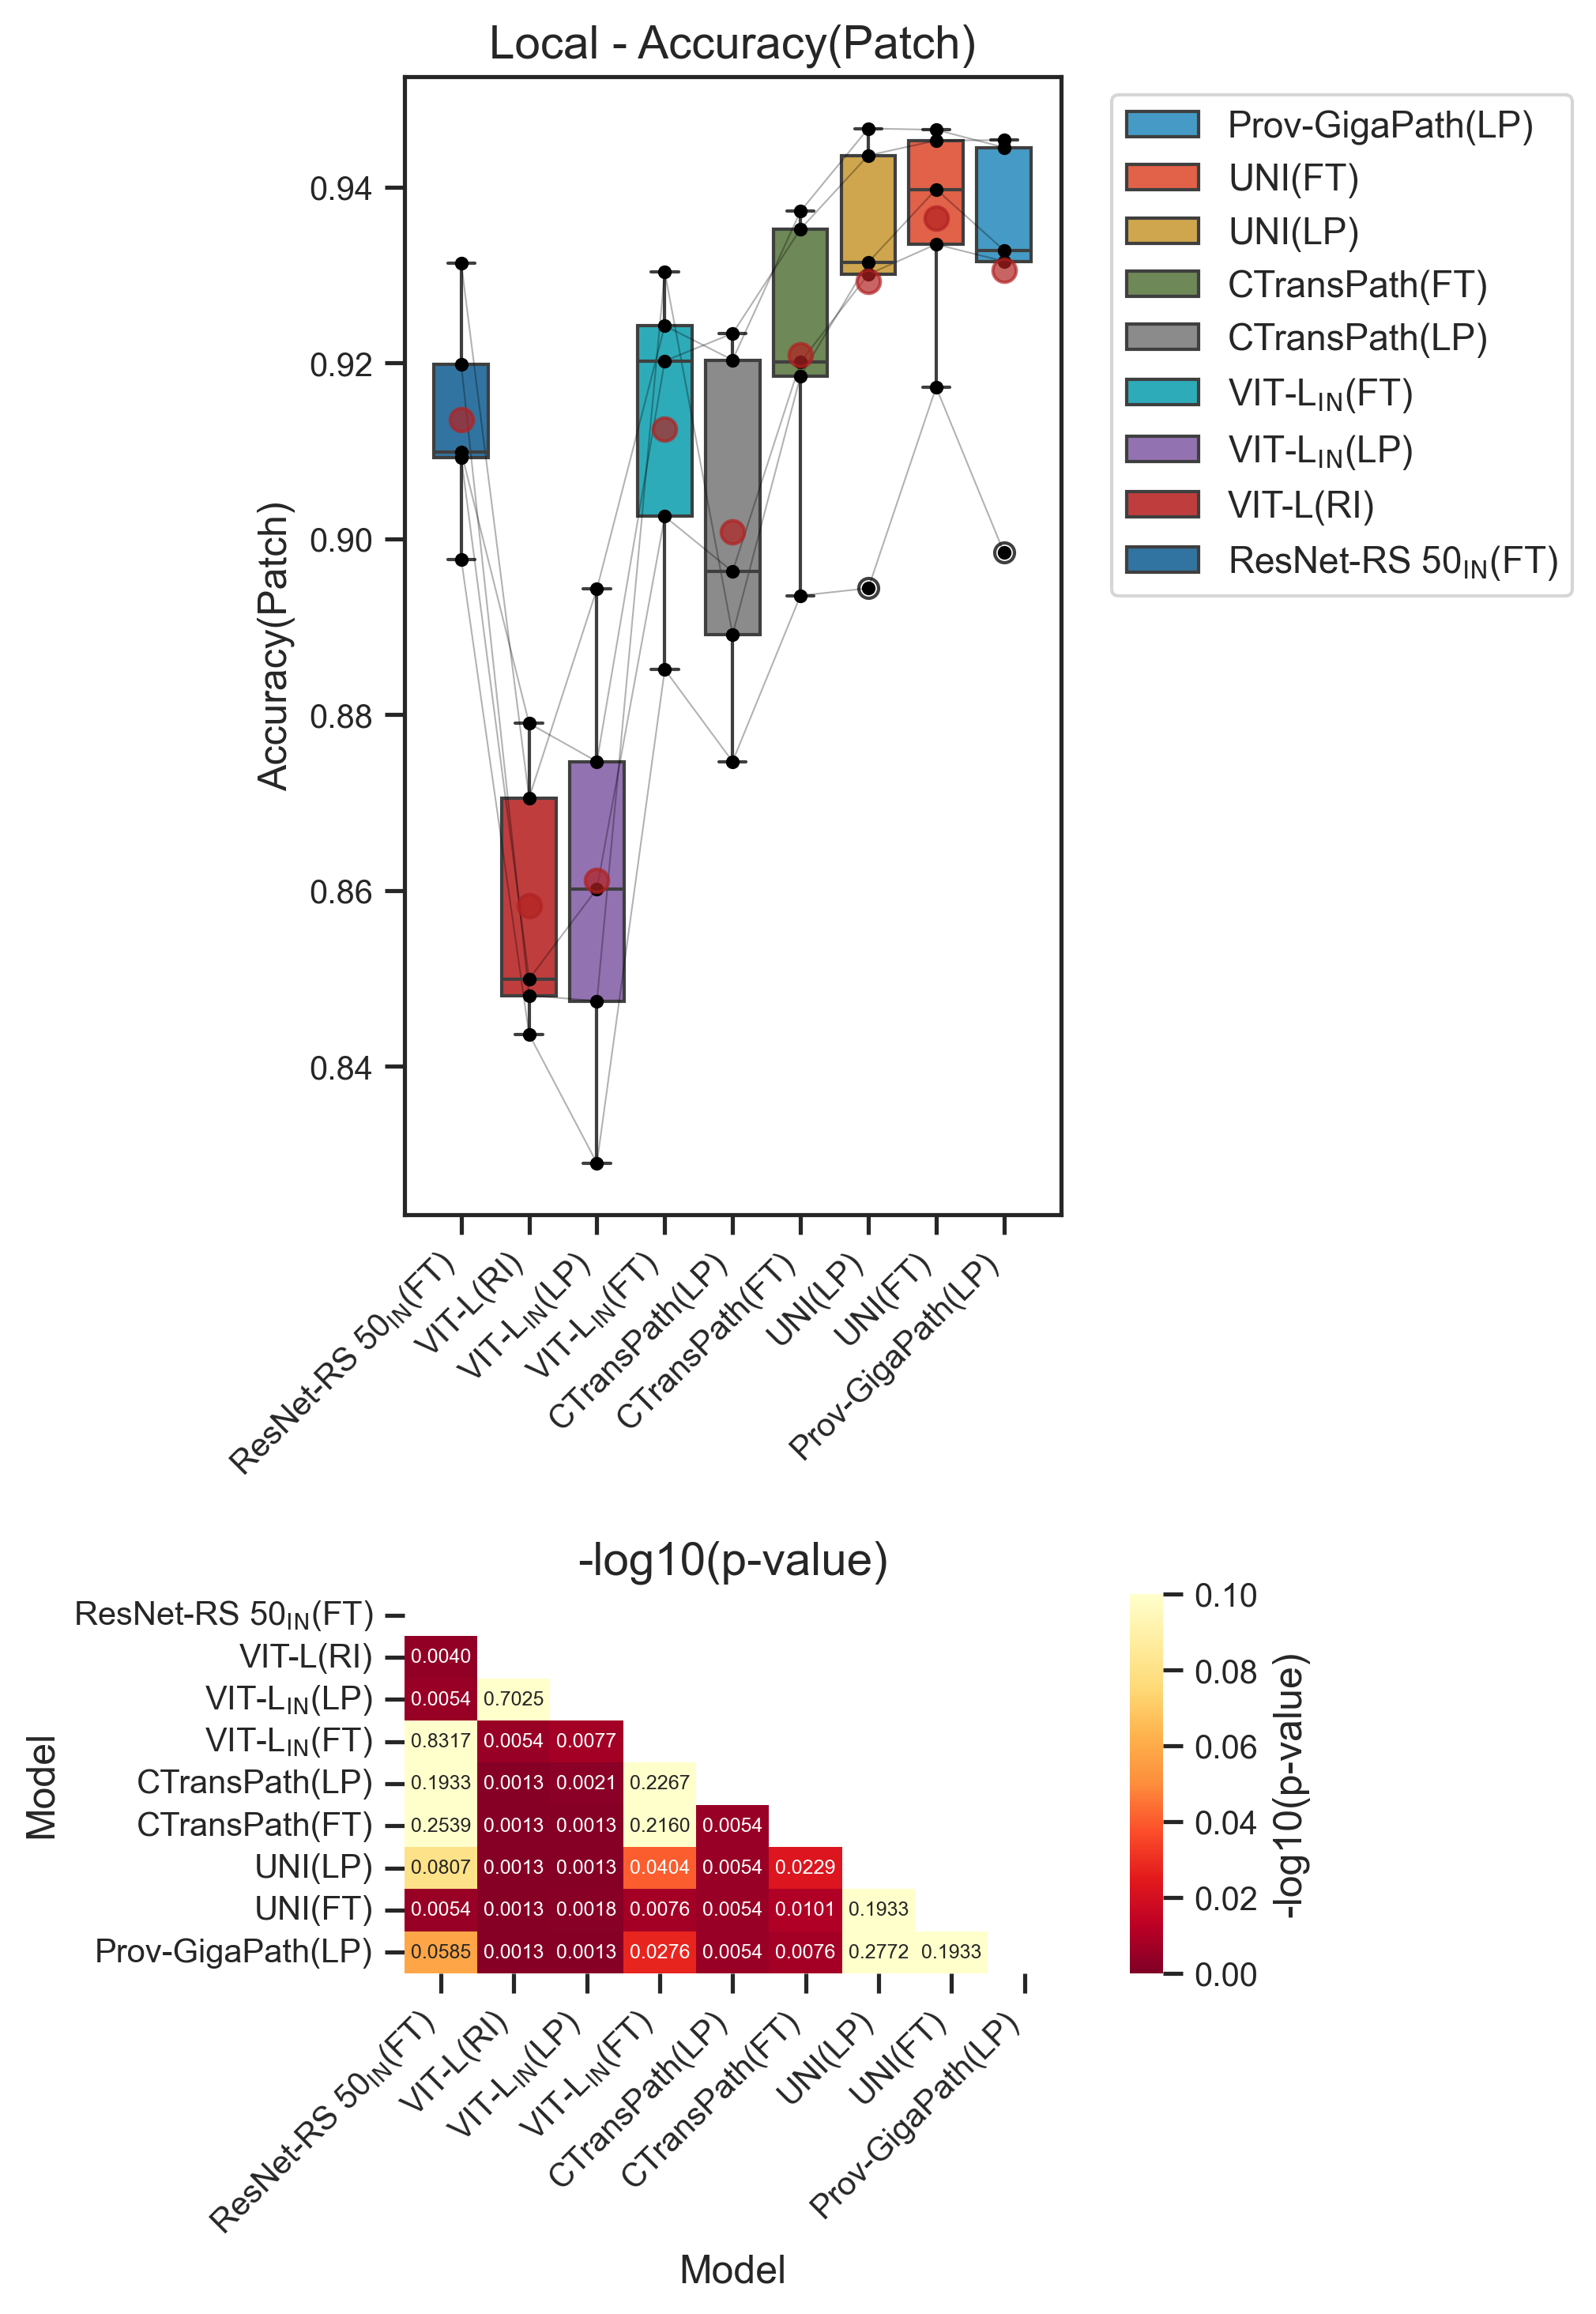

cv - fine - 500 - recall
saved out/figs/box_cv_fine_500_recall.png
cv - fine - 500 - acc
saved out/figs/box_cv_fine_500_acc.png
cv - fine - 500 - f1
saved out/figs/box_cv_fine_500_f1.png
ebrains - fine - 500 - pacc
saved out/figs/box_ebrains_fine_500_pacc.png


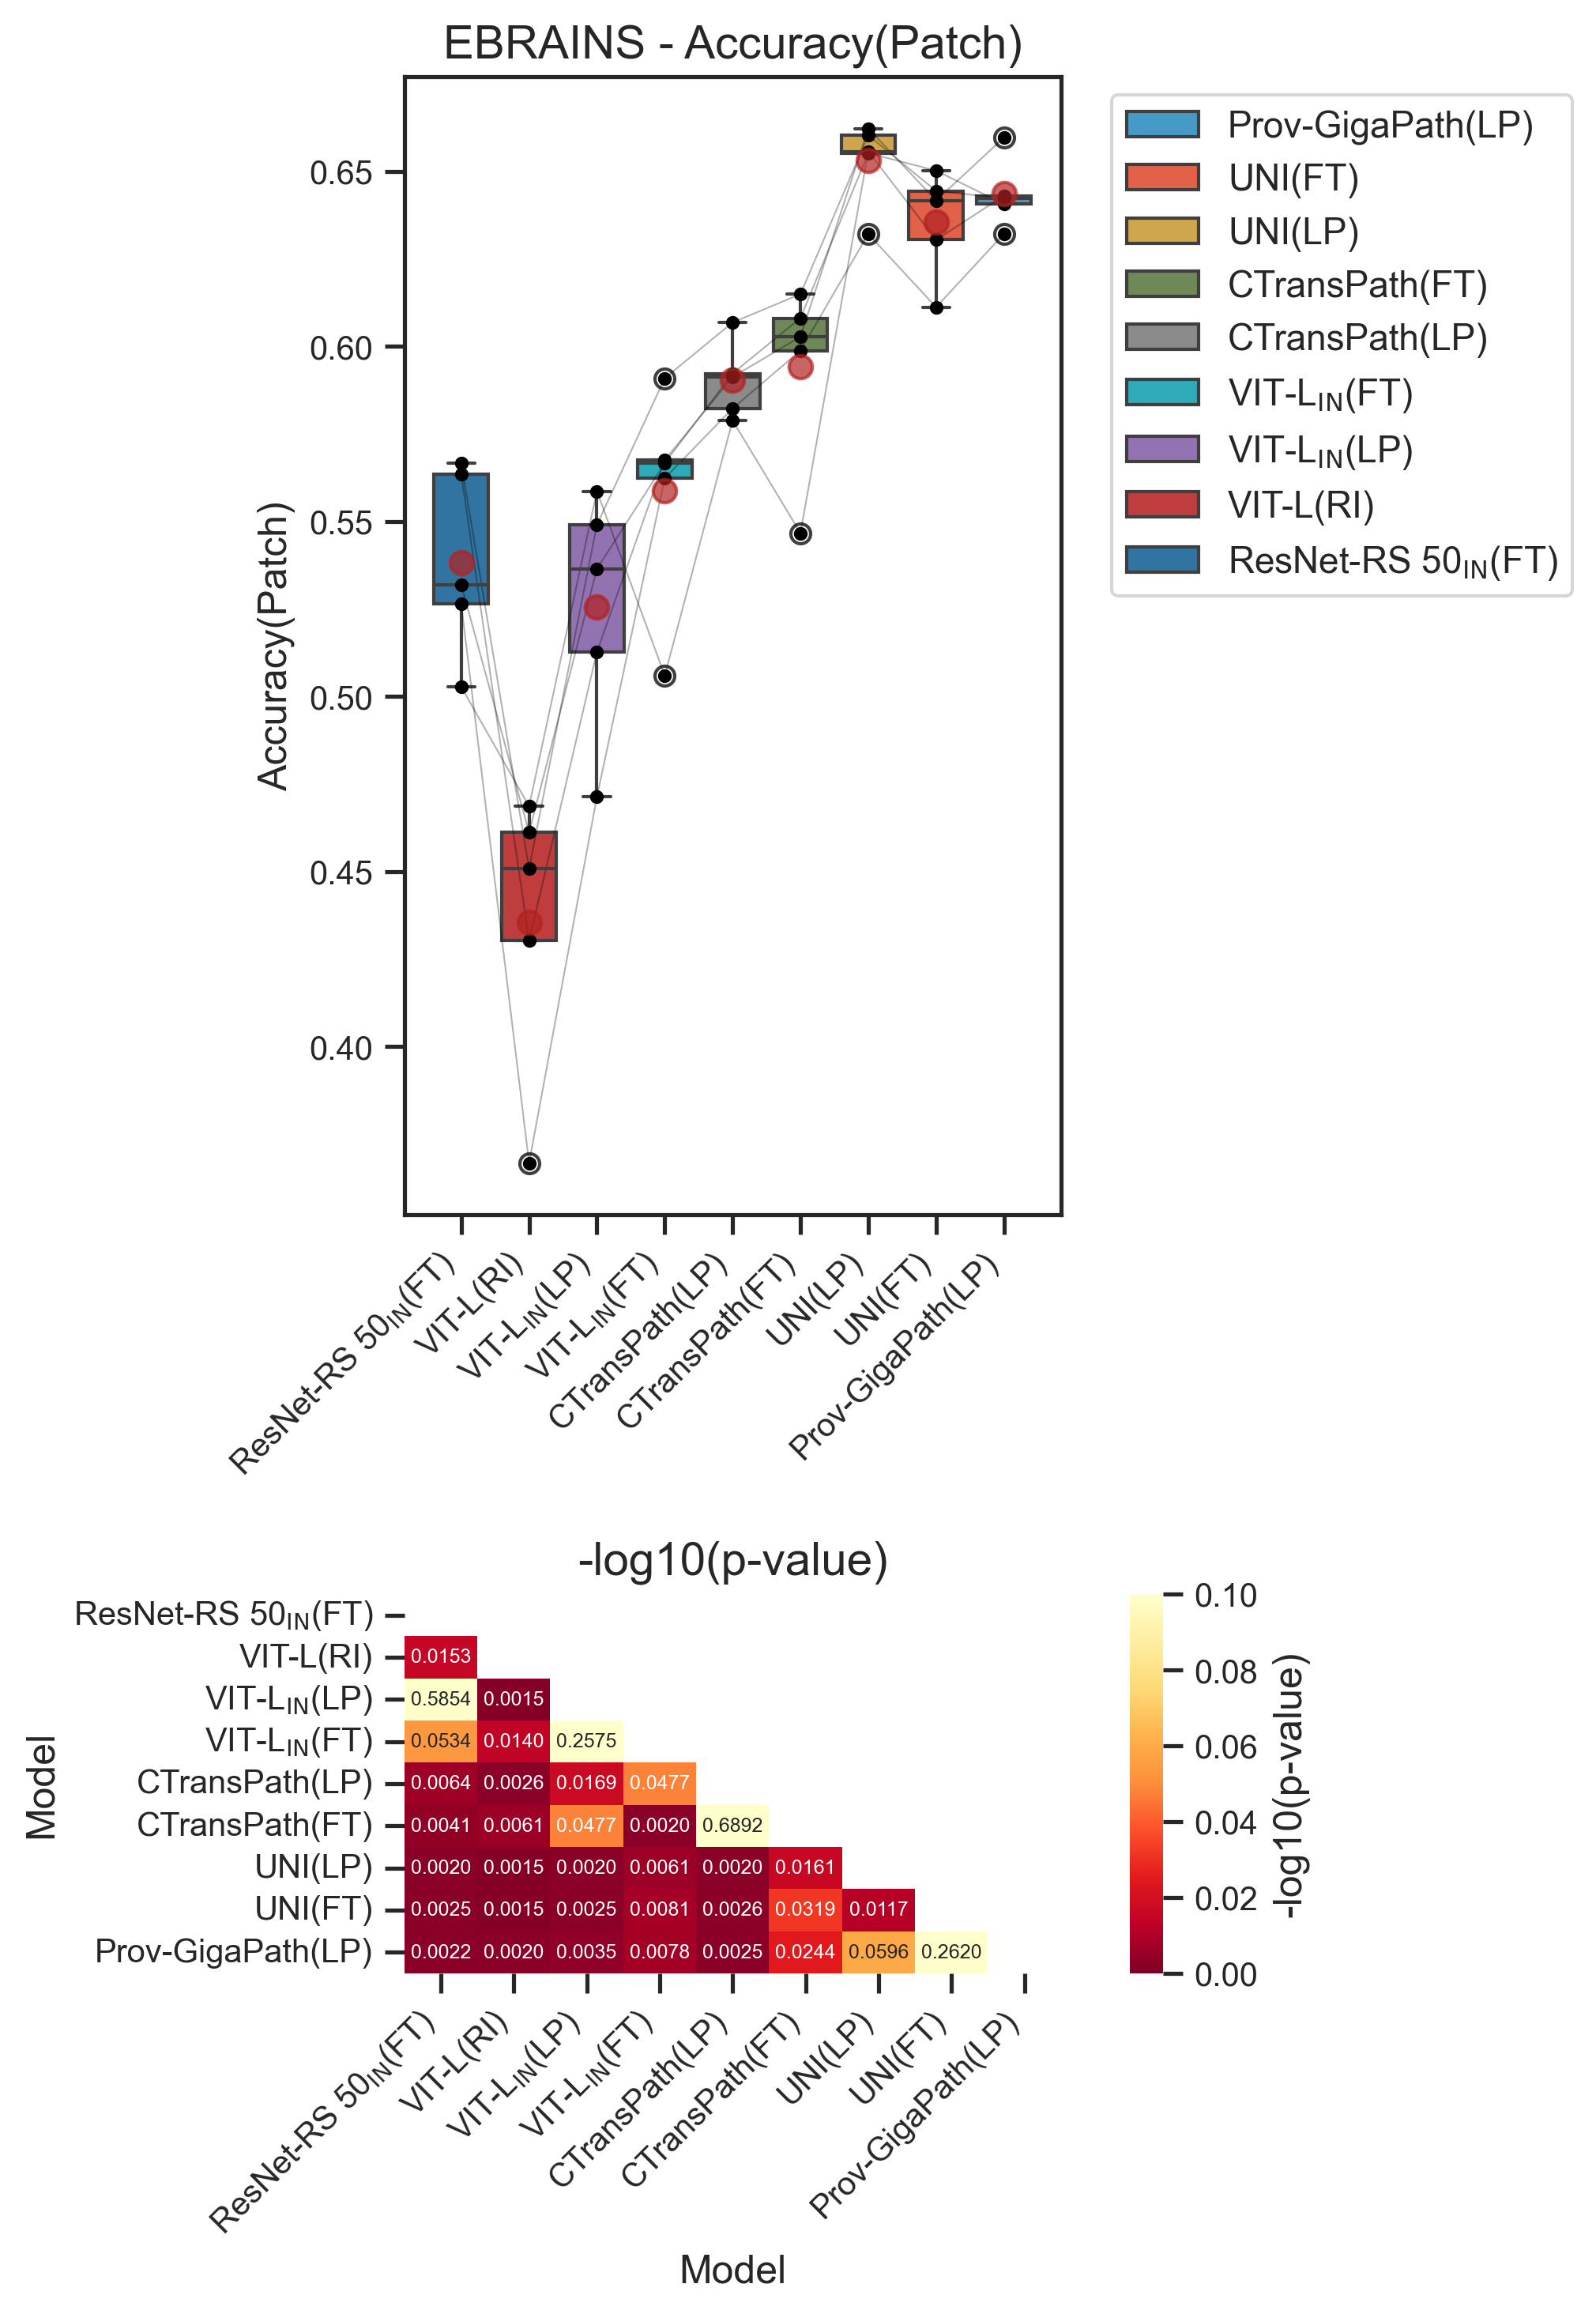

ebrains - fine - 500 - recall
saved out/figs/box_ebrains_fine_500_recall.png
ebrains - fine - 500 - acc
saved out/figs/box_ebrains_fine_500_acc.png
ebrains - fine - 500 - f1
saved out/figs/box_ebrains_fine_500_f1.png


In [11]:
paired_box('cv', False, LIMIT, 'pacc', True)
paired_box('cv', False, LIMIT, 'recall')
paired_box('cv', False, LIMIT, 'acc')
paired_box('cv', False, LIMIT, 'f1')

paired_box('ebrains', False, LIMIT, 'pacc', True)
paired_box('ebrains', False, LIMIT, 'recall')
paired_box('ebrains', False, LIMIT, 'acc')
paired_box('ebrains', False, LIMIT, 'f1')

### EBRAINS 500 fine patches/case

cv - coarse - 500 - pacc
saved out/figs/box_cv_coarse_500_pacc.png


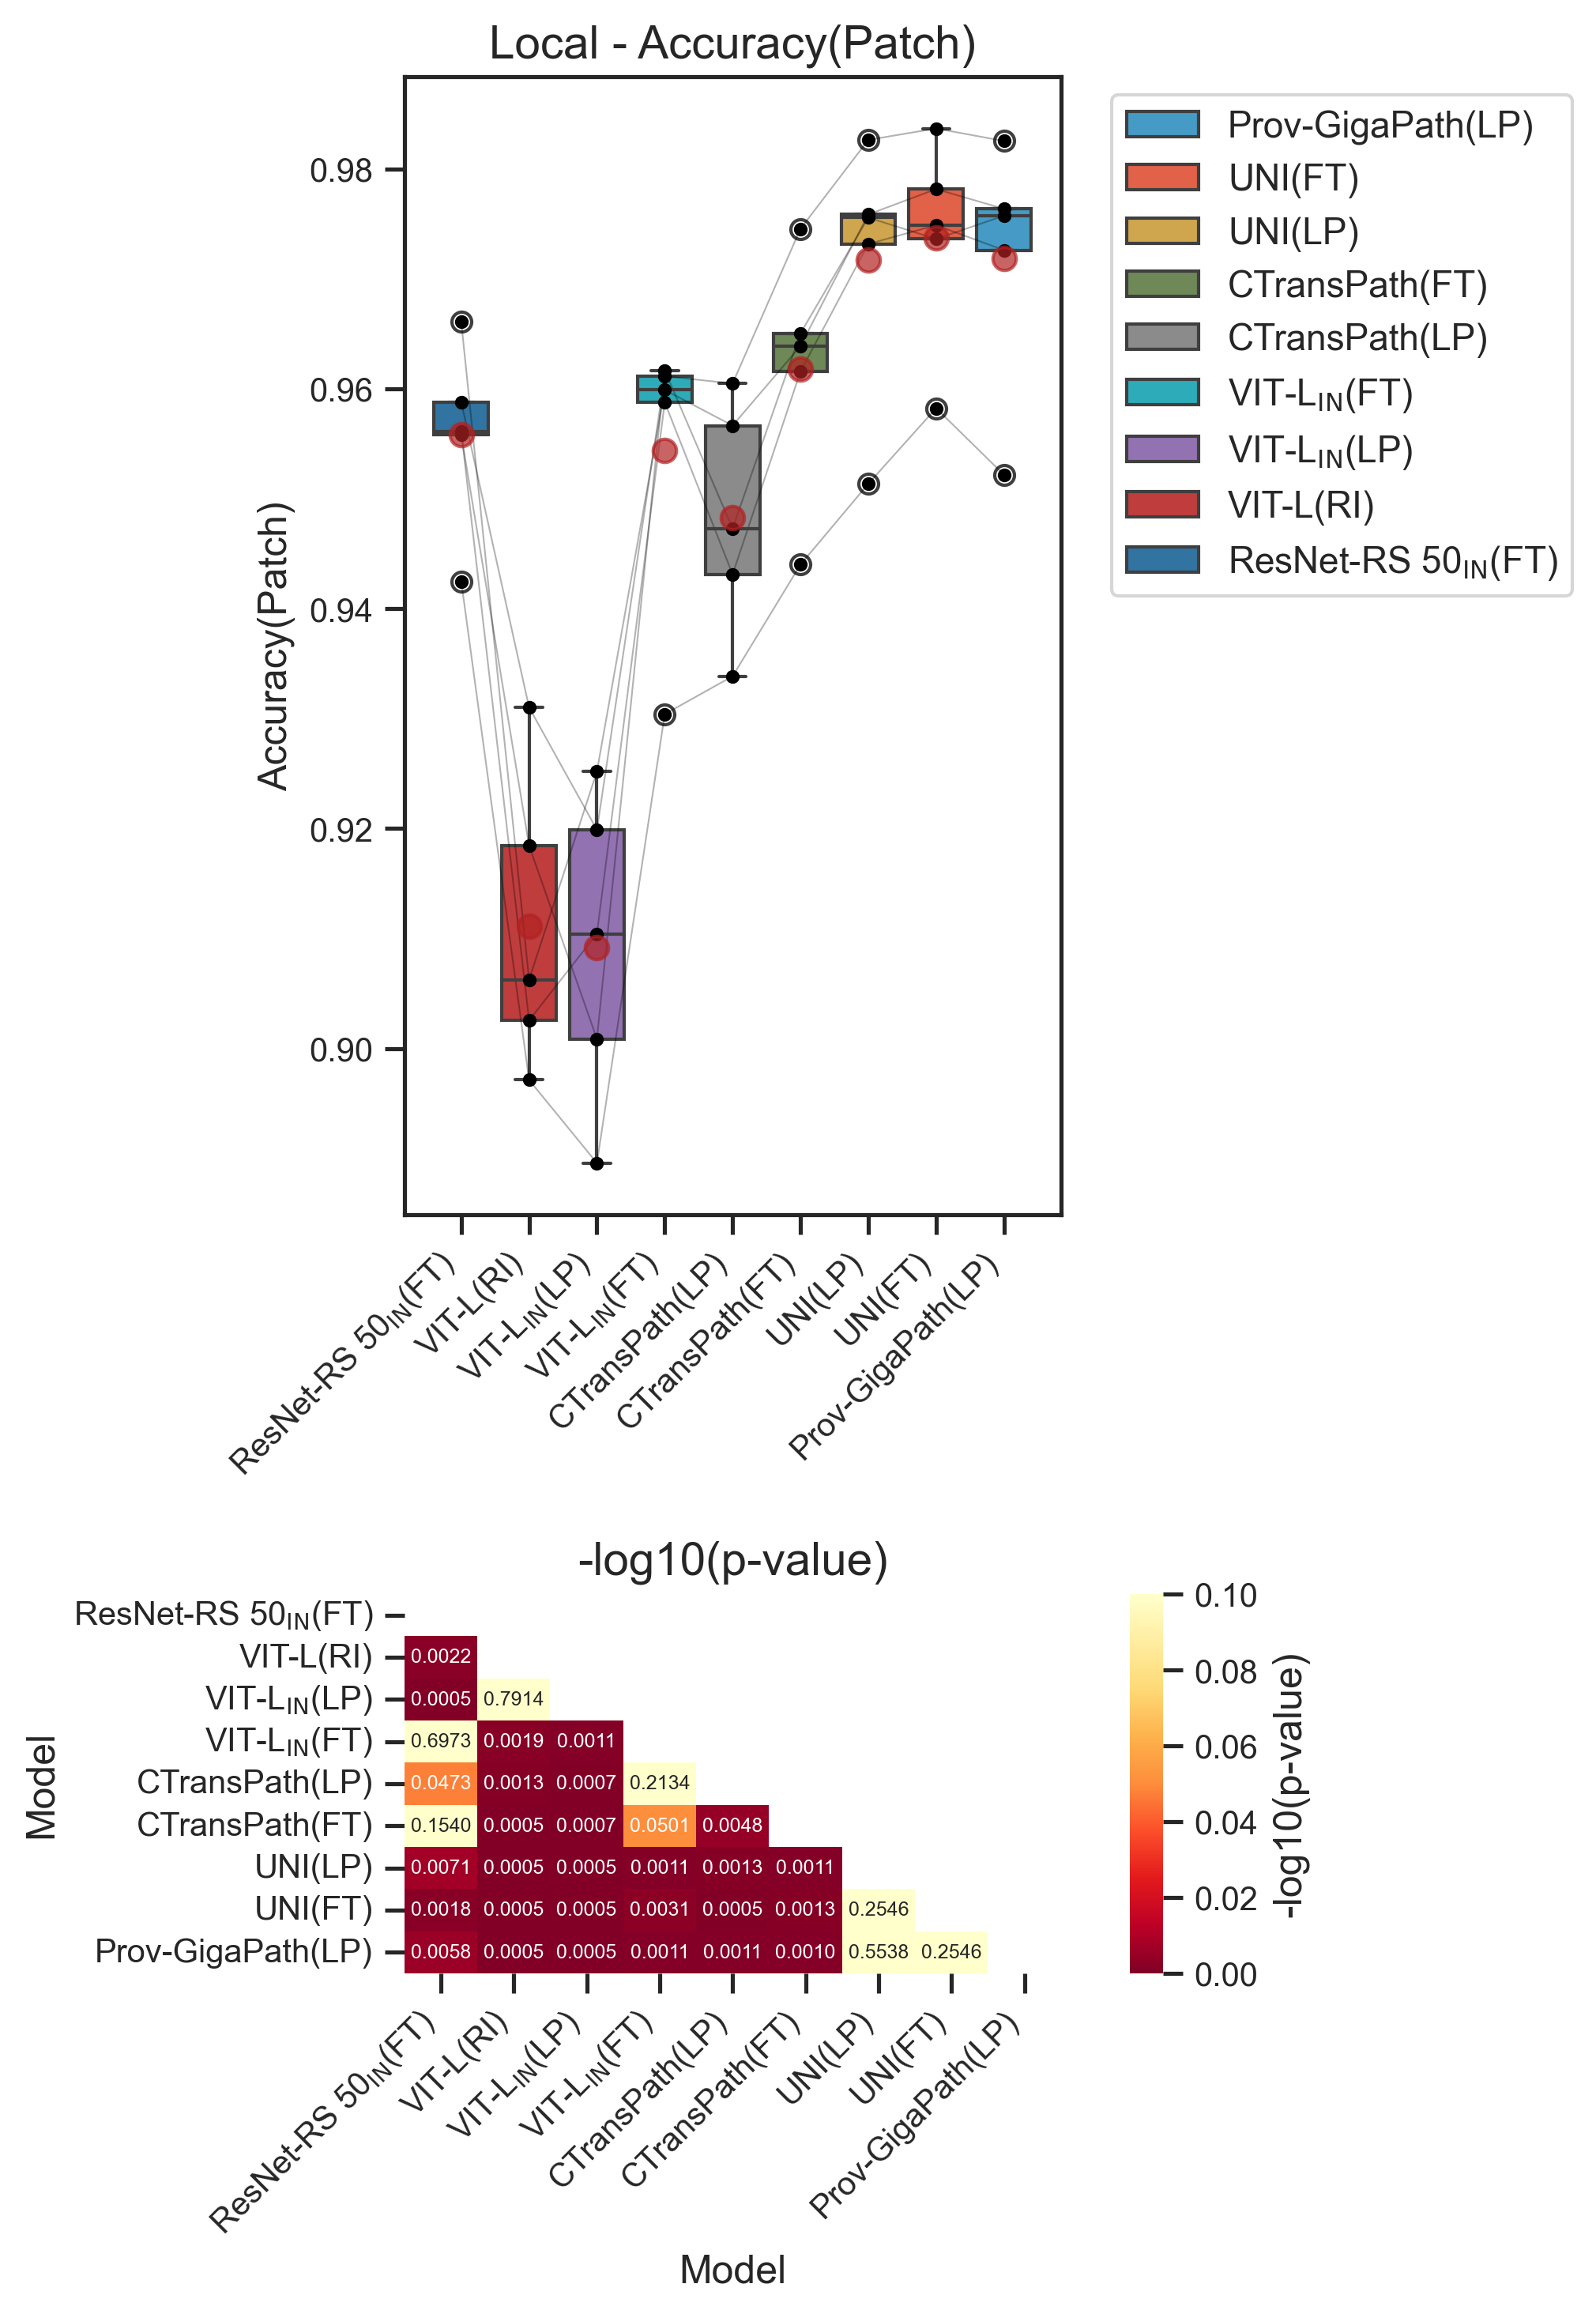

cv - coarse - 500 - recall
saved out/figs/box_cv_coarse_500_recall.png
cv - coarse - 500 - acc
saved out/figs/box_cv_coarse_500_acc.png
cv - coarse - 500 - f1
saved out/figs/box_cv_coarse_500_f1.png
ebrains - coarse - 500 - pacc
saved out/figs/box_ebrains_coarse_500_pacc.png


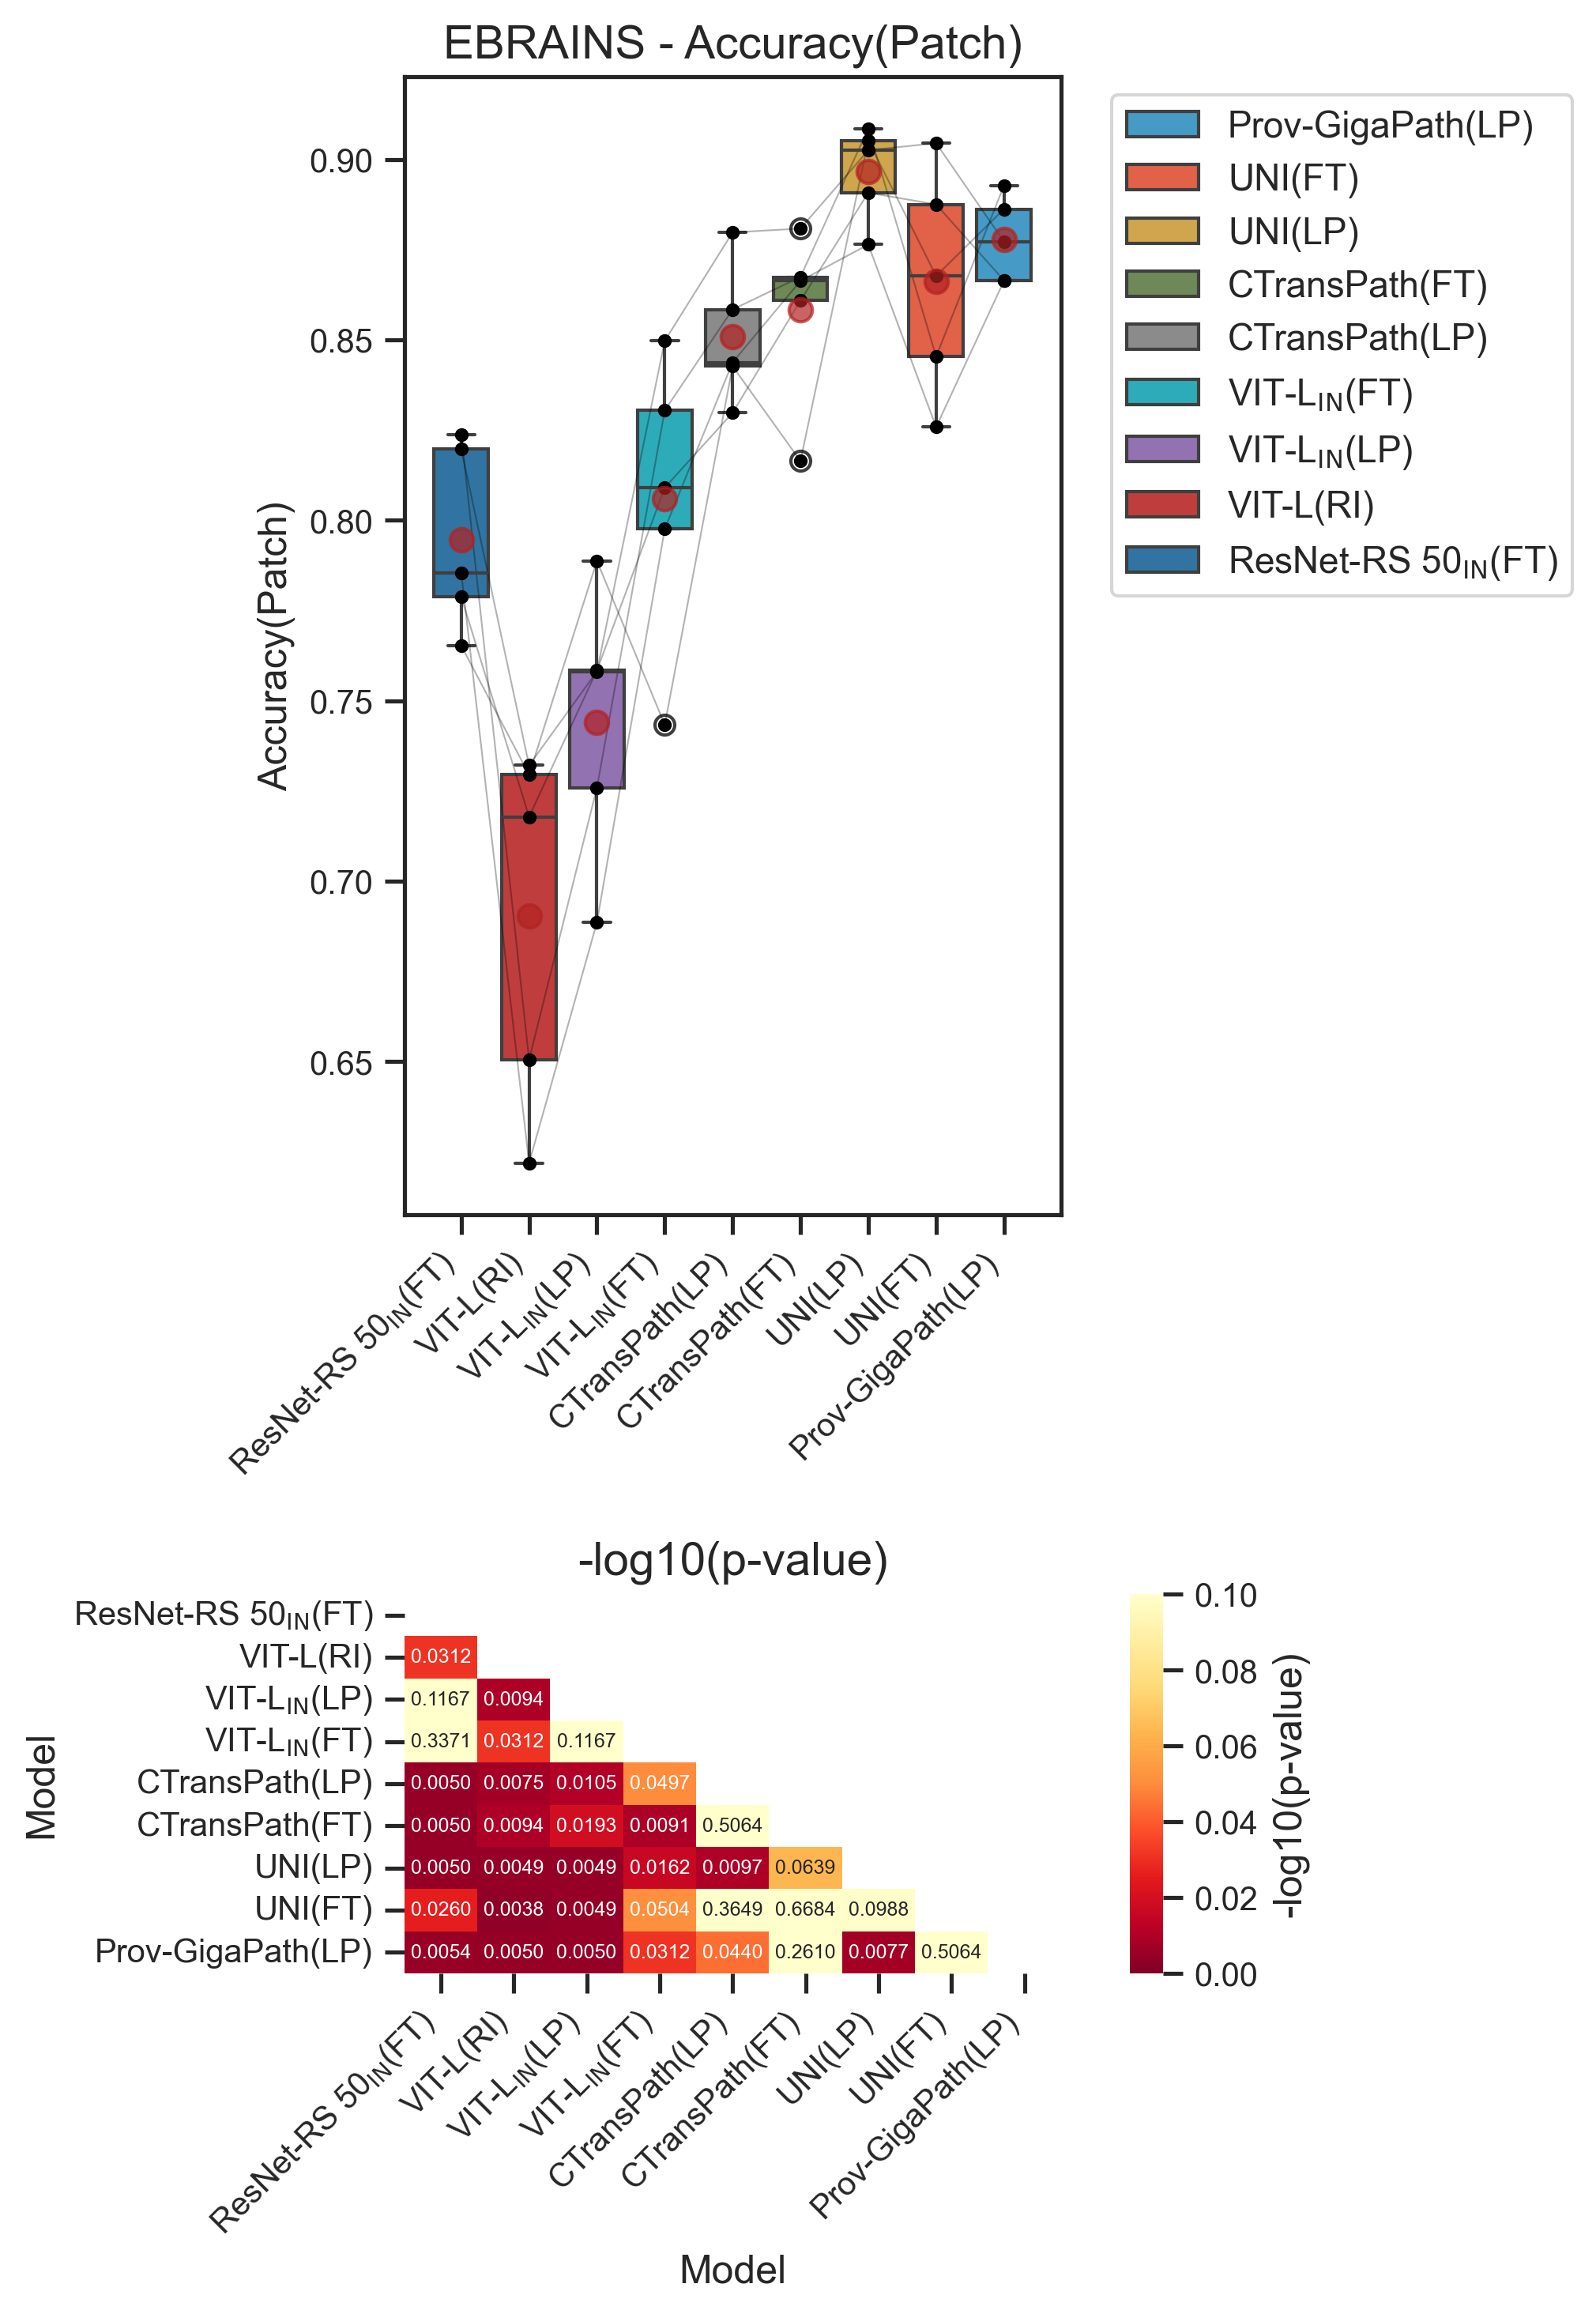

ebrains - coarse - 500 - recall
saved out/figs/box_ebrains_coarse_500_recall.png
ebrains - coarse - 500 - acc
saved out/figs/box_ebrains_coarse_500_acc.png
ebrains - coarse - 500 - f1
saved out/figs/box_ebrains_coarse_500_f1.png


In [12]:
paired_box('cv', True, LIMIT, 'pacc', True)
paired_box('cv', True, LIMIT, 'recall')
paired_box('cv', True, LIMIT, 'acc')
paired_box('cv', True, LIMIT, 'f1')

paired_box('ebrains', True, LIMIT, 'pacc', True)
paired_box('ebrains', True, LIMIT, 'recall')
paired_box('ebrains', True, LIMIT, 'acc')
paired_box('ebrains', True, LIMIT, 'f1')

#### fig4

This fig shows the impact of patch number per case on model performace

In [16]:
def draw_lines(target, key:str, coarse:bool, fill=False, show=False):
    labels = [
        r'Prov-GigaPath(LP)',
        r'UNI(FT)',
        r'UNI(LP)',
        r'CTransPath(FT)',
        r'CTransPath(LP)',
        r'VIT-L$\mathrm{_{IN}}$(FT)',
        r'VIT-L$\mathrm{_{IN}}$(LP)',
        r'VIT-L(RI)',
        r'ResNet-RS 50$\mathrm{_{IN}}$(FT)',
        # r'ResNet-RS 50$\mathrm{_{IN}}$(LP)',
    ]

    grains = 'coarse' if coarse else 'fine'
    key_label = {
        'pacc': 'Accuracy(Patch)',
        'recall': 'Recall',
        'acc': 'Accuracy',
        'f1': 'F1 score',
    }[key]
    
    # color_map = dict(zip((label_order), plt.cm.Set2(np.linspace(0, 1, len(label_order)))))
    # color_map = dict(zip(label_order, sns.color_palette(PALETTE, n_colors=len(label_order))))
    
    limits = [10, 25, 100, 500]
    alpha = 0.05
    
    values_by_limit = []

    for limit in limits:
        values = []
        df = pd.read_excel(f'out/figs/results_{grains}_{target}.xlsx', sheet_name=f'{limit}', index_col=0)

        # if labels is None:
        #     if limit == limits[0]:
        #         # sort on 10 limit
        #         df_mean = df.groupby('label')[key].mean().sort_values(ascending=True)
        #         df[f'average_{key}'] = df['label'].map(df_mean)
        #         df = df.sort_values([f'average_{key}', 'fold'], ascending=[True, True])
        #         labels = df['label'].unique()[::-1]

        for label in labels:
            scores = df[df['label']==label][key_label]
            mean = np.mean(scores)
            diff = stats.sem(scores)
            # CI
            # diff = stats.t.interval(1 - alpha, df=len(scores)-1, loc=mean, scale=diff)[1] - mean
            values.append([mean, mean-diff, mean+diff])
        values_by_limit.append(values)    
    values_by_cond = np.array(values_by_limit).transpose(1, 0, 2)
    
    plt.figure(figsize=(6, 7))
    x = np.arange(1, 1+len(limits))

    for i, label in enumerate(labels):
        ci_l = values_by_cond[i, :, 1]
        ci_h = values_by_cond[i, :, 2]
        # c = colors[i]
        c = color_map[label]
        plt.plot(x, values_by_cond[i, :, 0], color=c, label=label)
        if fill:
            plt.fill_between(x, ci_l, ci_h, color=c, alpha=0.1)
    
    plt.xticks(x, limits)
    plt.xlabel('Patch count per case')
    plt.ylabel(key_label)
    # plt.legend(loc='lower right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    # plt.grid(True, linestyle='--', alpha=0.7)
    target_dataset = {
        'cv': 'Local',
        'ebrains': 'EBRAINS',
    }[target]
    plt.title(f'{target_dataset} - {key_label}')    
    plt.tight_layout()
    fig_path = f'out/figs/lines_{target}_{grains}_{key}.png'
    plt.savefig(fig_path, format="png", dpi=DPI)
    print(f'wrote {fig_path}')
    if show:
        plt.show()
    else:
        plt.close()



wrote out/figs/lines_cv_fine_pacc.png


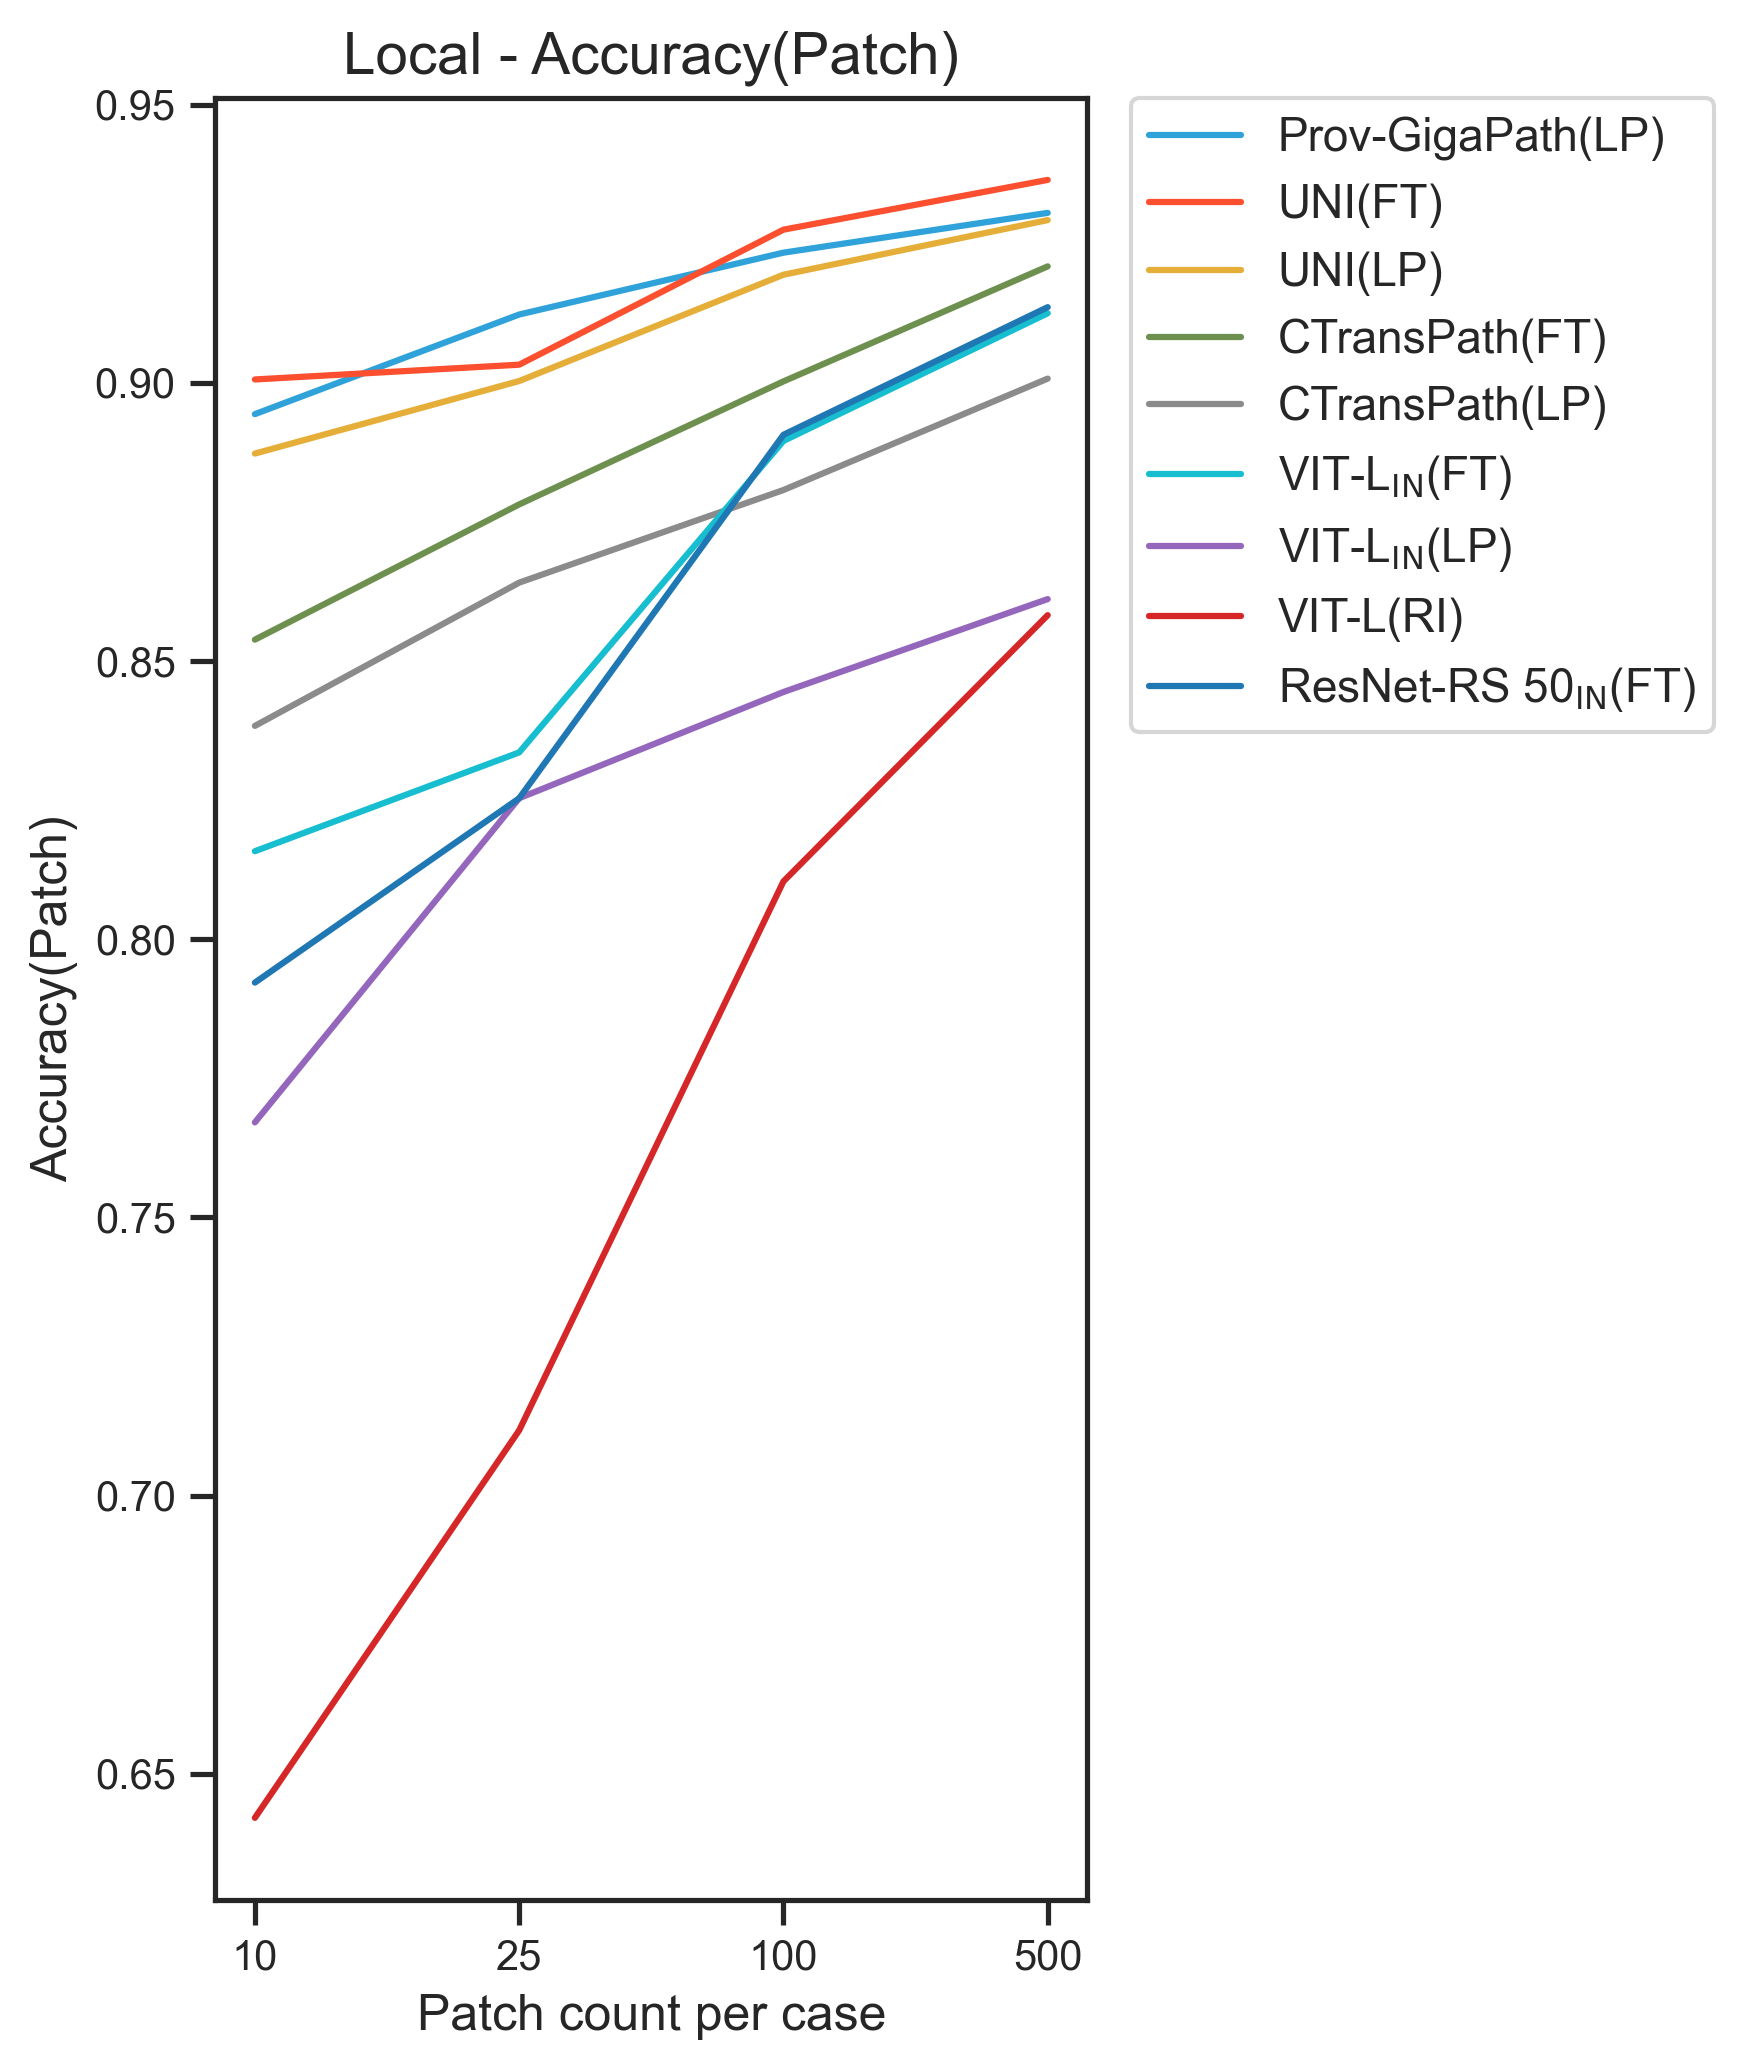

wrote out/figs/lines_cv_fine_recall.png
wrote out/figs/lines_cv_fine_acc.png
wrote out/figs/lines_cv_fine_f1.png
wrote out/figs/lines_ebrains_fine_pacc.png


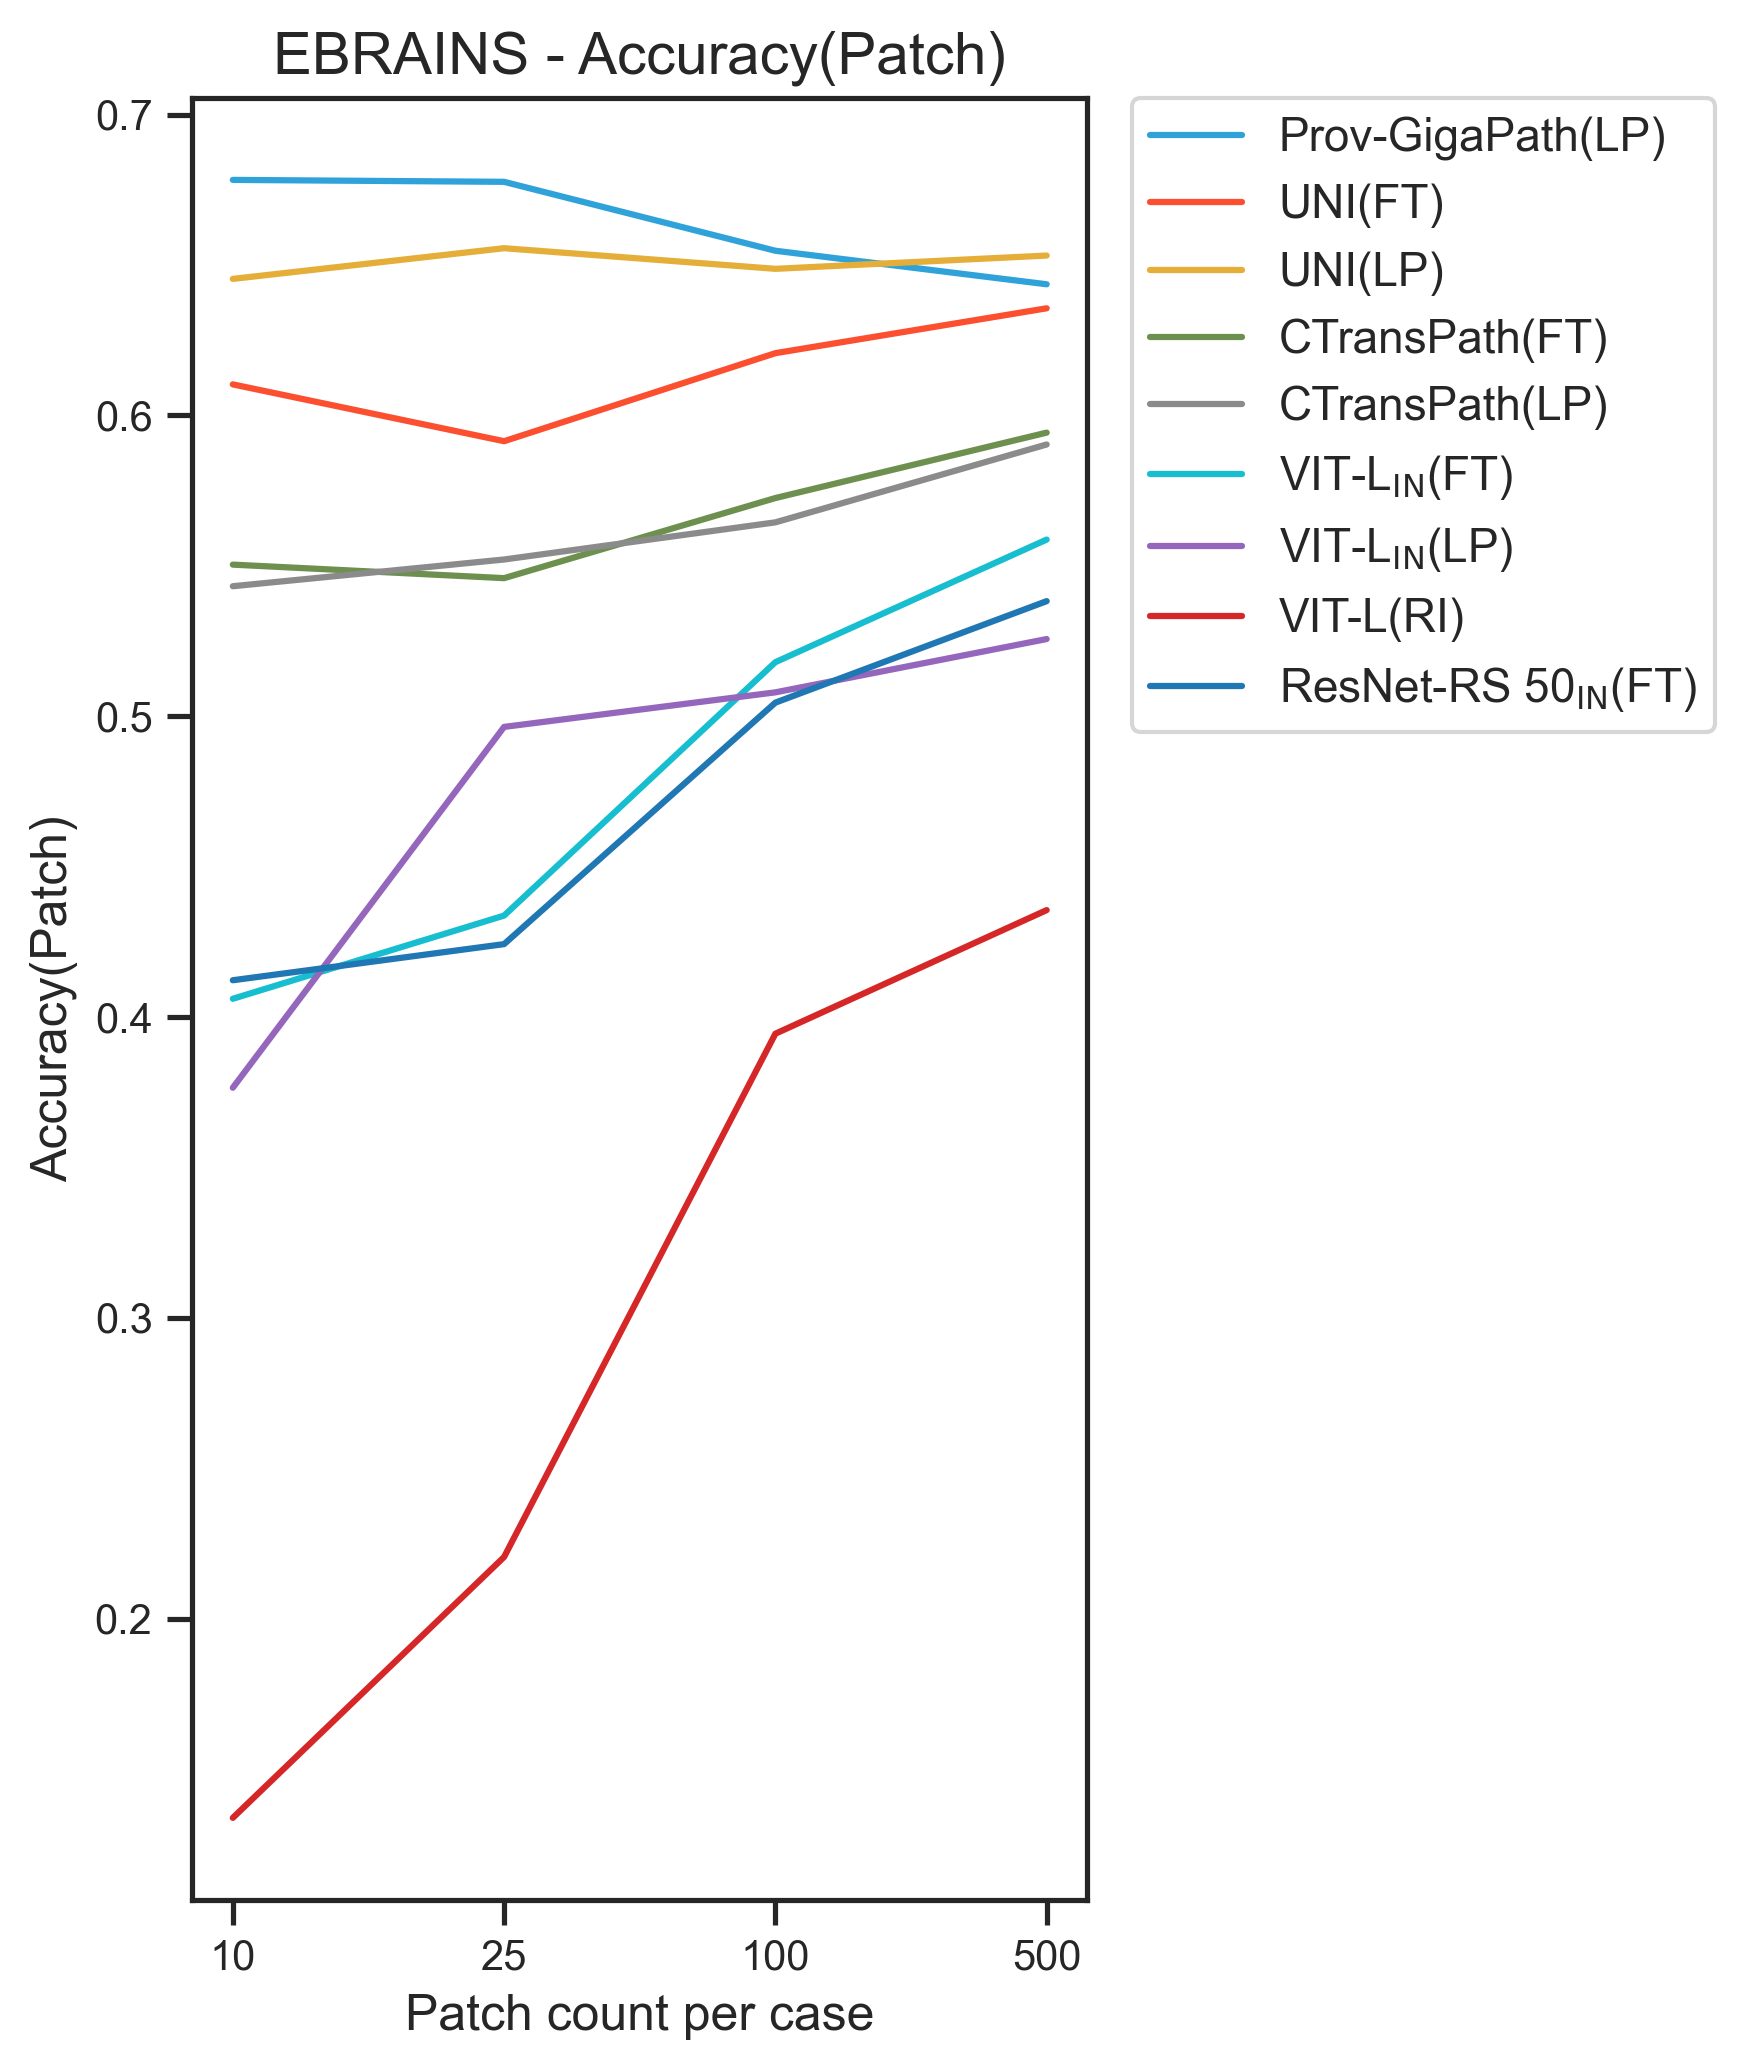

wrote out/figs/lines_ebrains_fine_recall.png
wrote out/figs/lines_ebrains_fine_acc.png
wrote out/figs/lines_ebrains_fine_f1.png


In [17]:
draw_lines('cv', 'pacc', False, show=True)
draw_lines('cv', 'recall', False)
draw_lines('cv', 'acc', False)
draw_lines('cv', 'f1', False)

draw_lines('ebrains', 'pacc', False, show=True)
draw_lines('ebrains', 'recall', False)
draw_lines('ebrains', 'acc', False)
draw_lines('ebrains', 'f1', False)

### Fig4: EBRAINS - lines

wrote out/figs/lines_cv_coarse_pacc.png


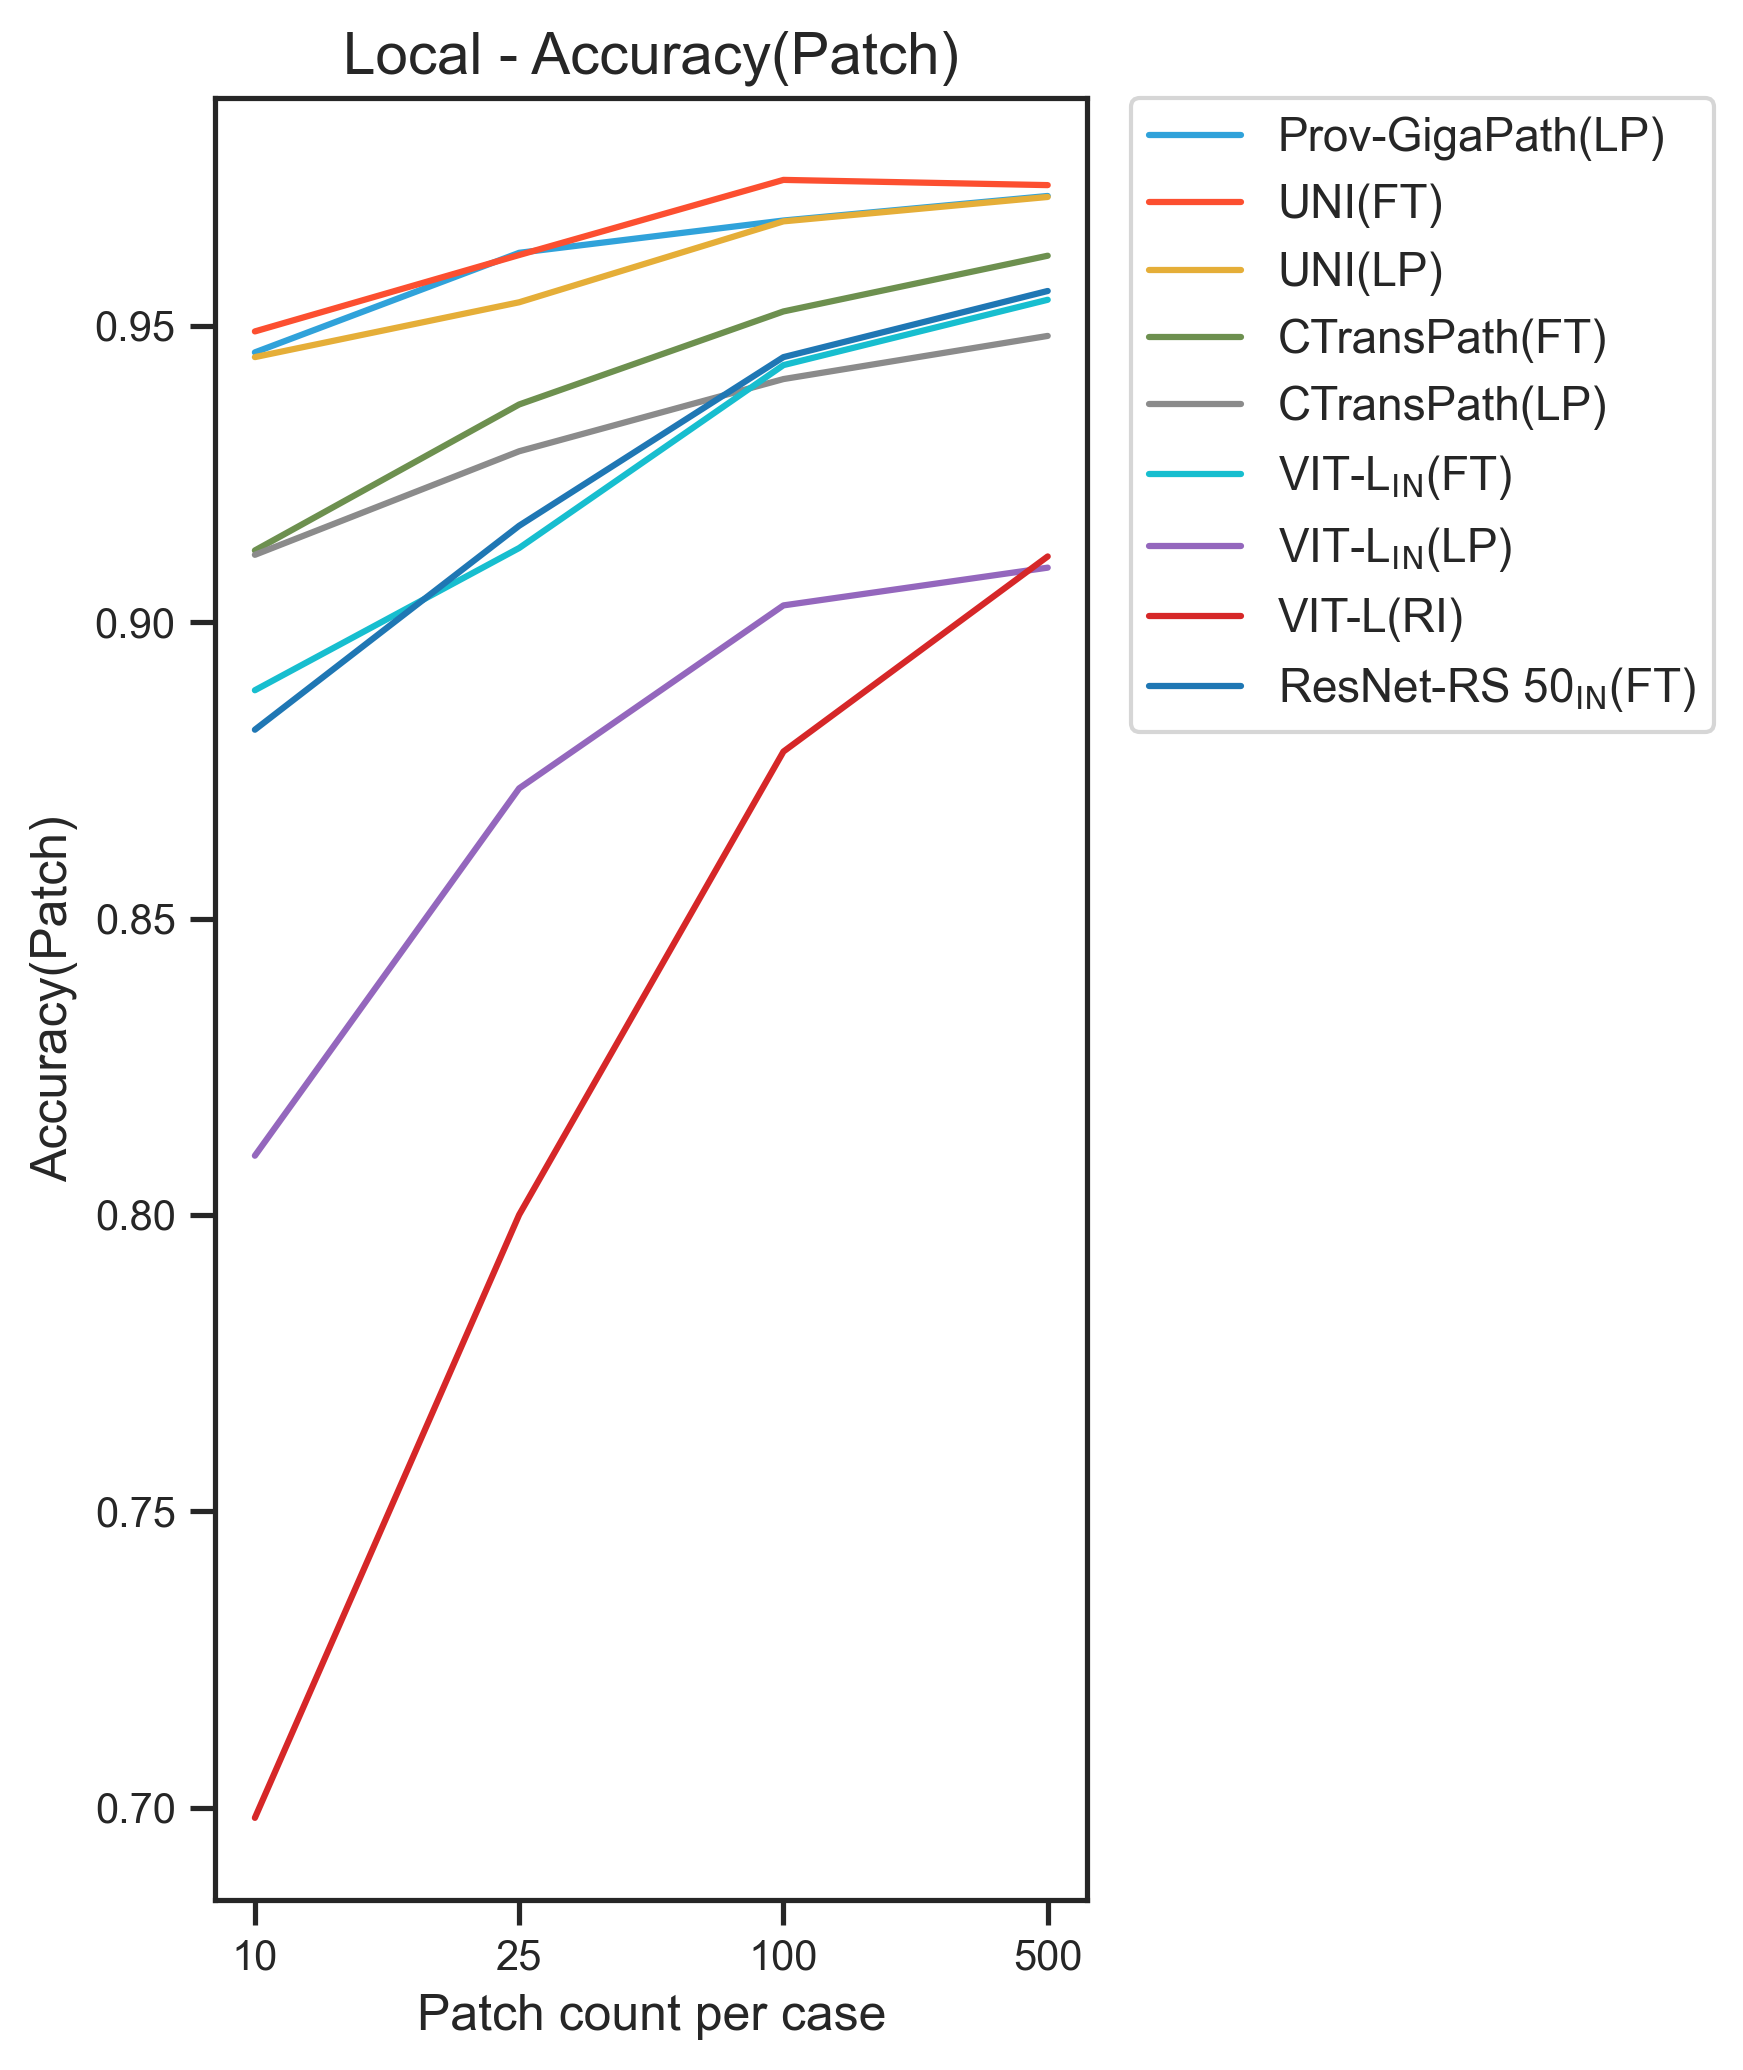

wrote out/figs/lines_cv_coarse_recall.png


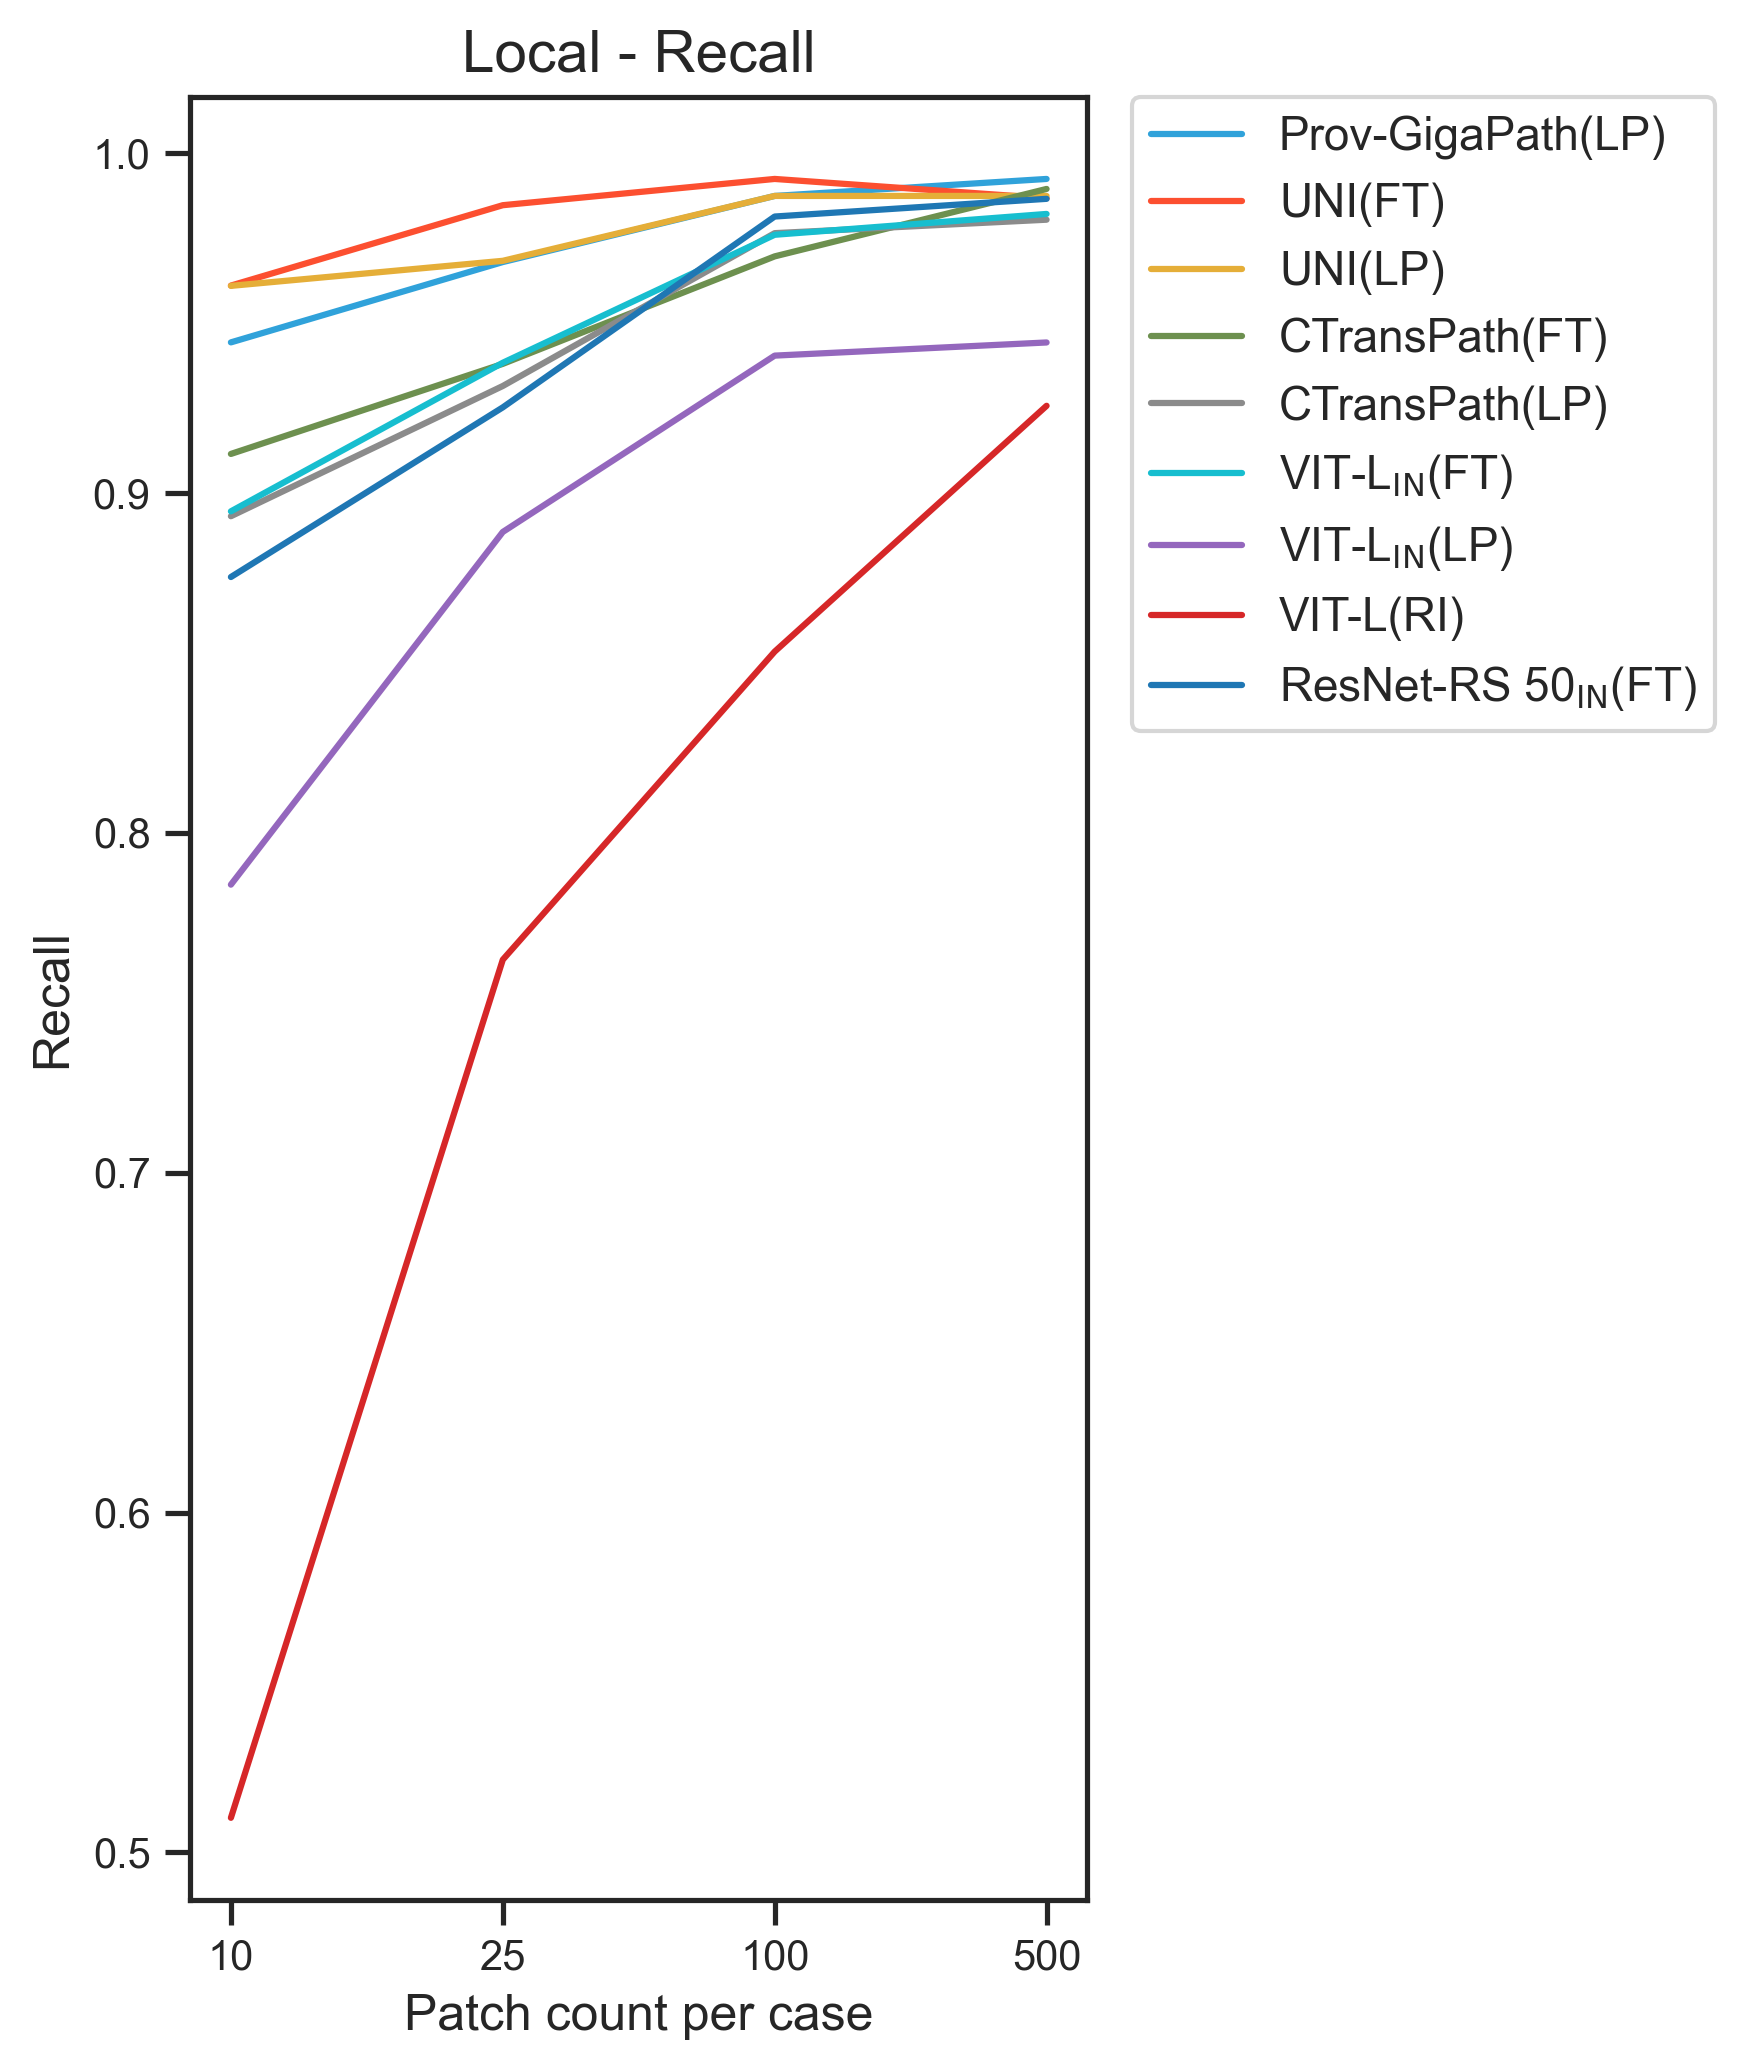

wrote out/figs/lines_cv_coarse_acc.png


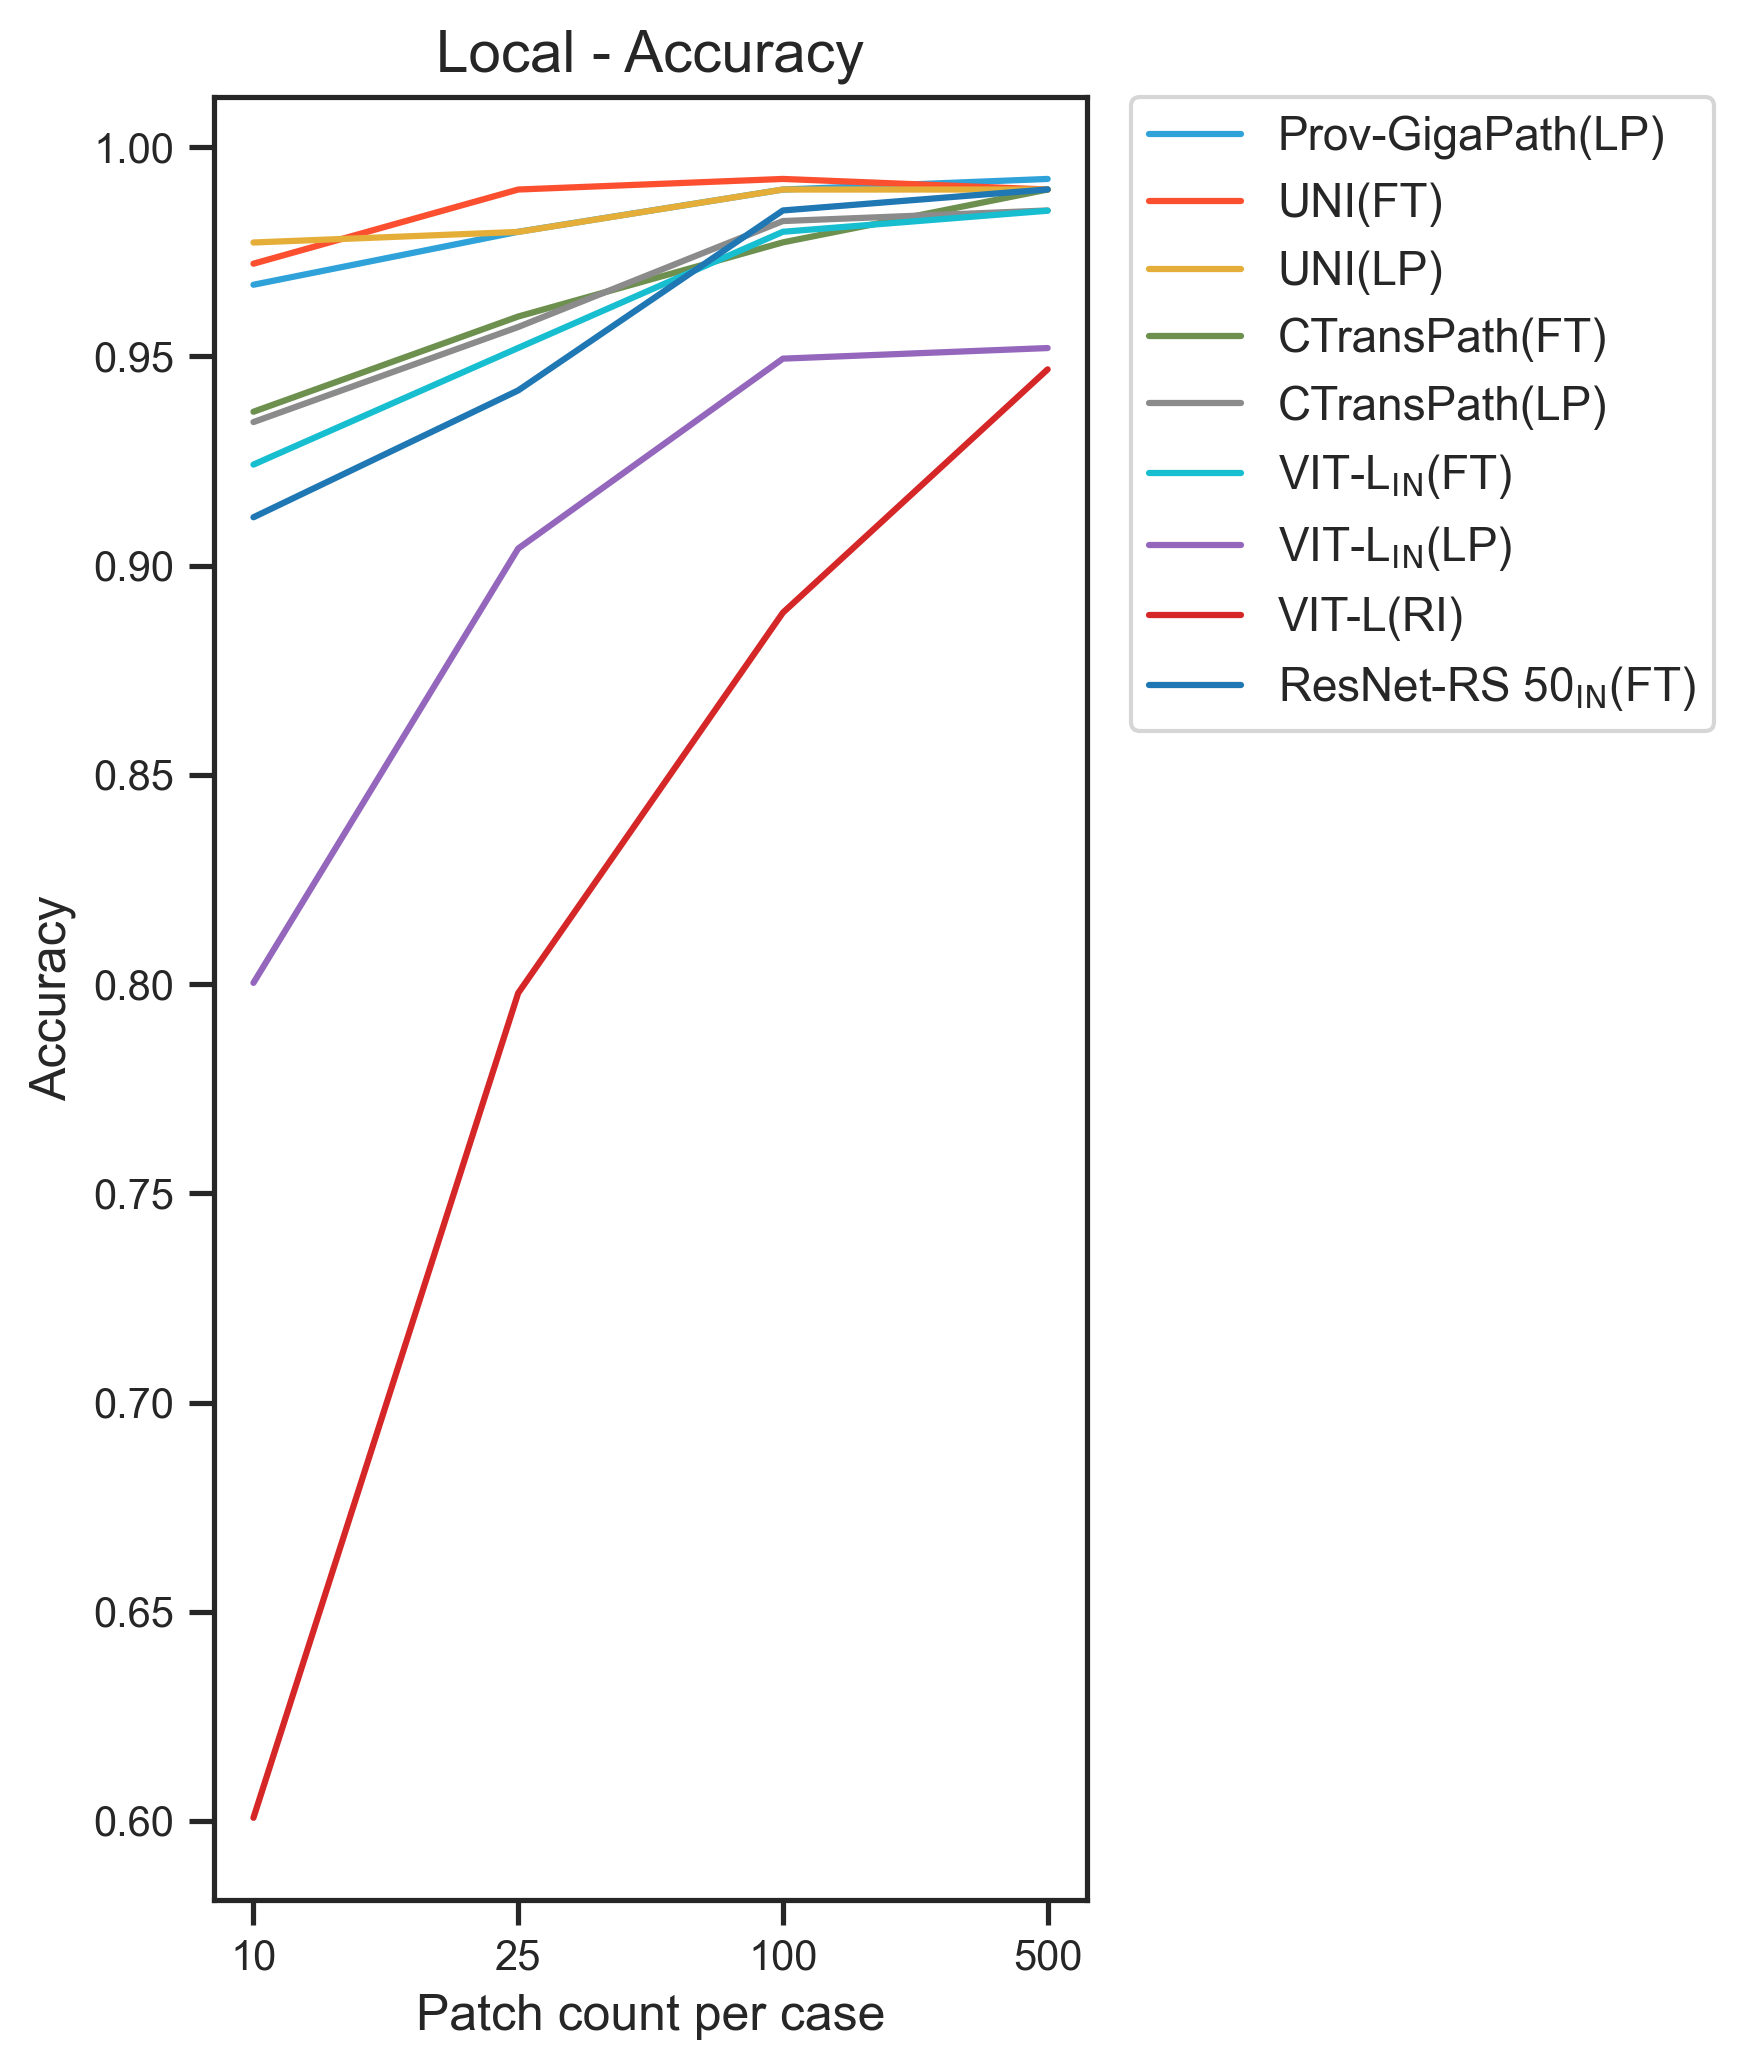

wrote out/figs/lines_cv_coarse_f1.png
wrote out/figs/lines_ebrains_coarse_pacc.png


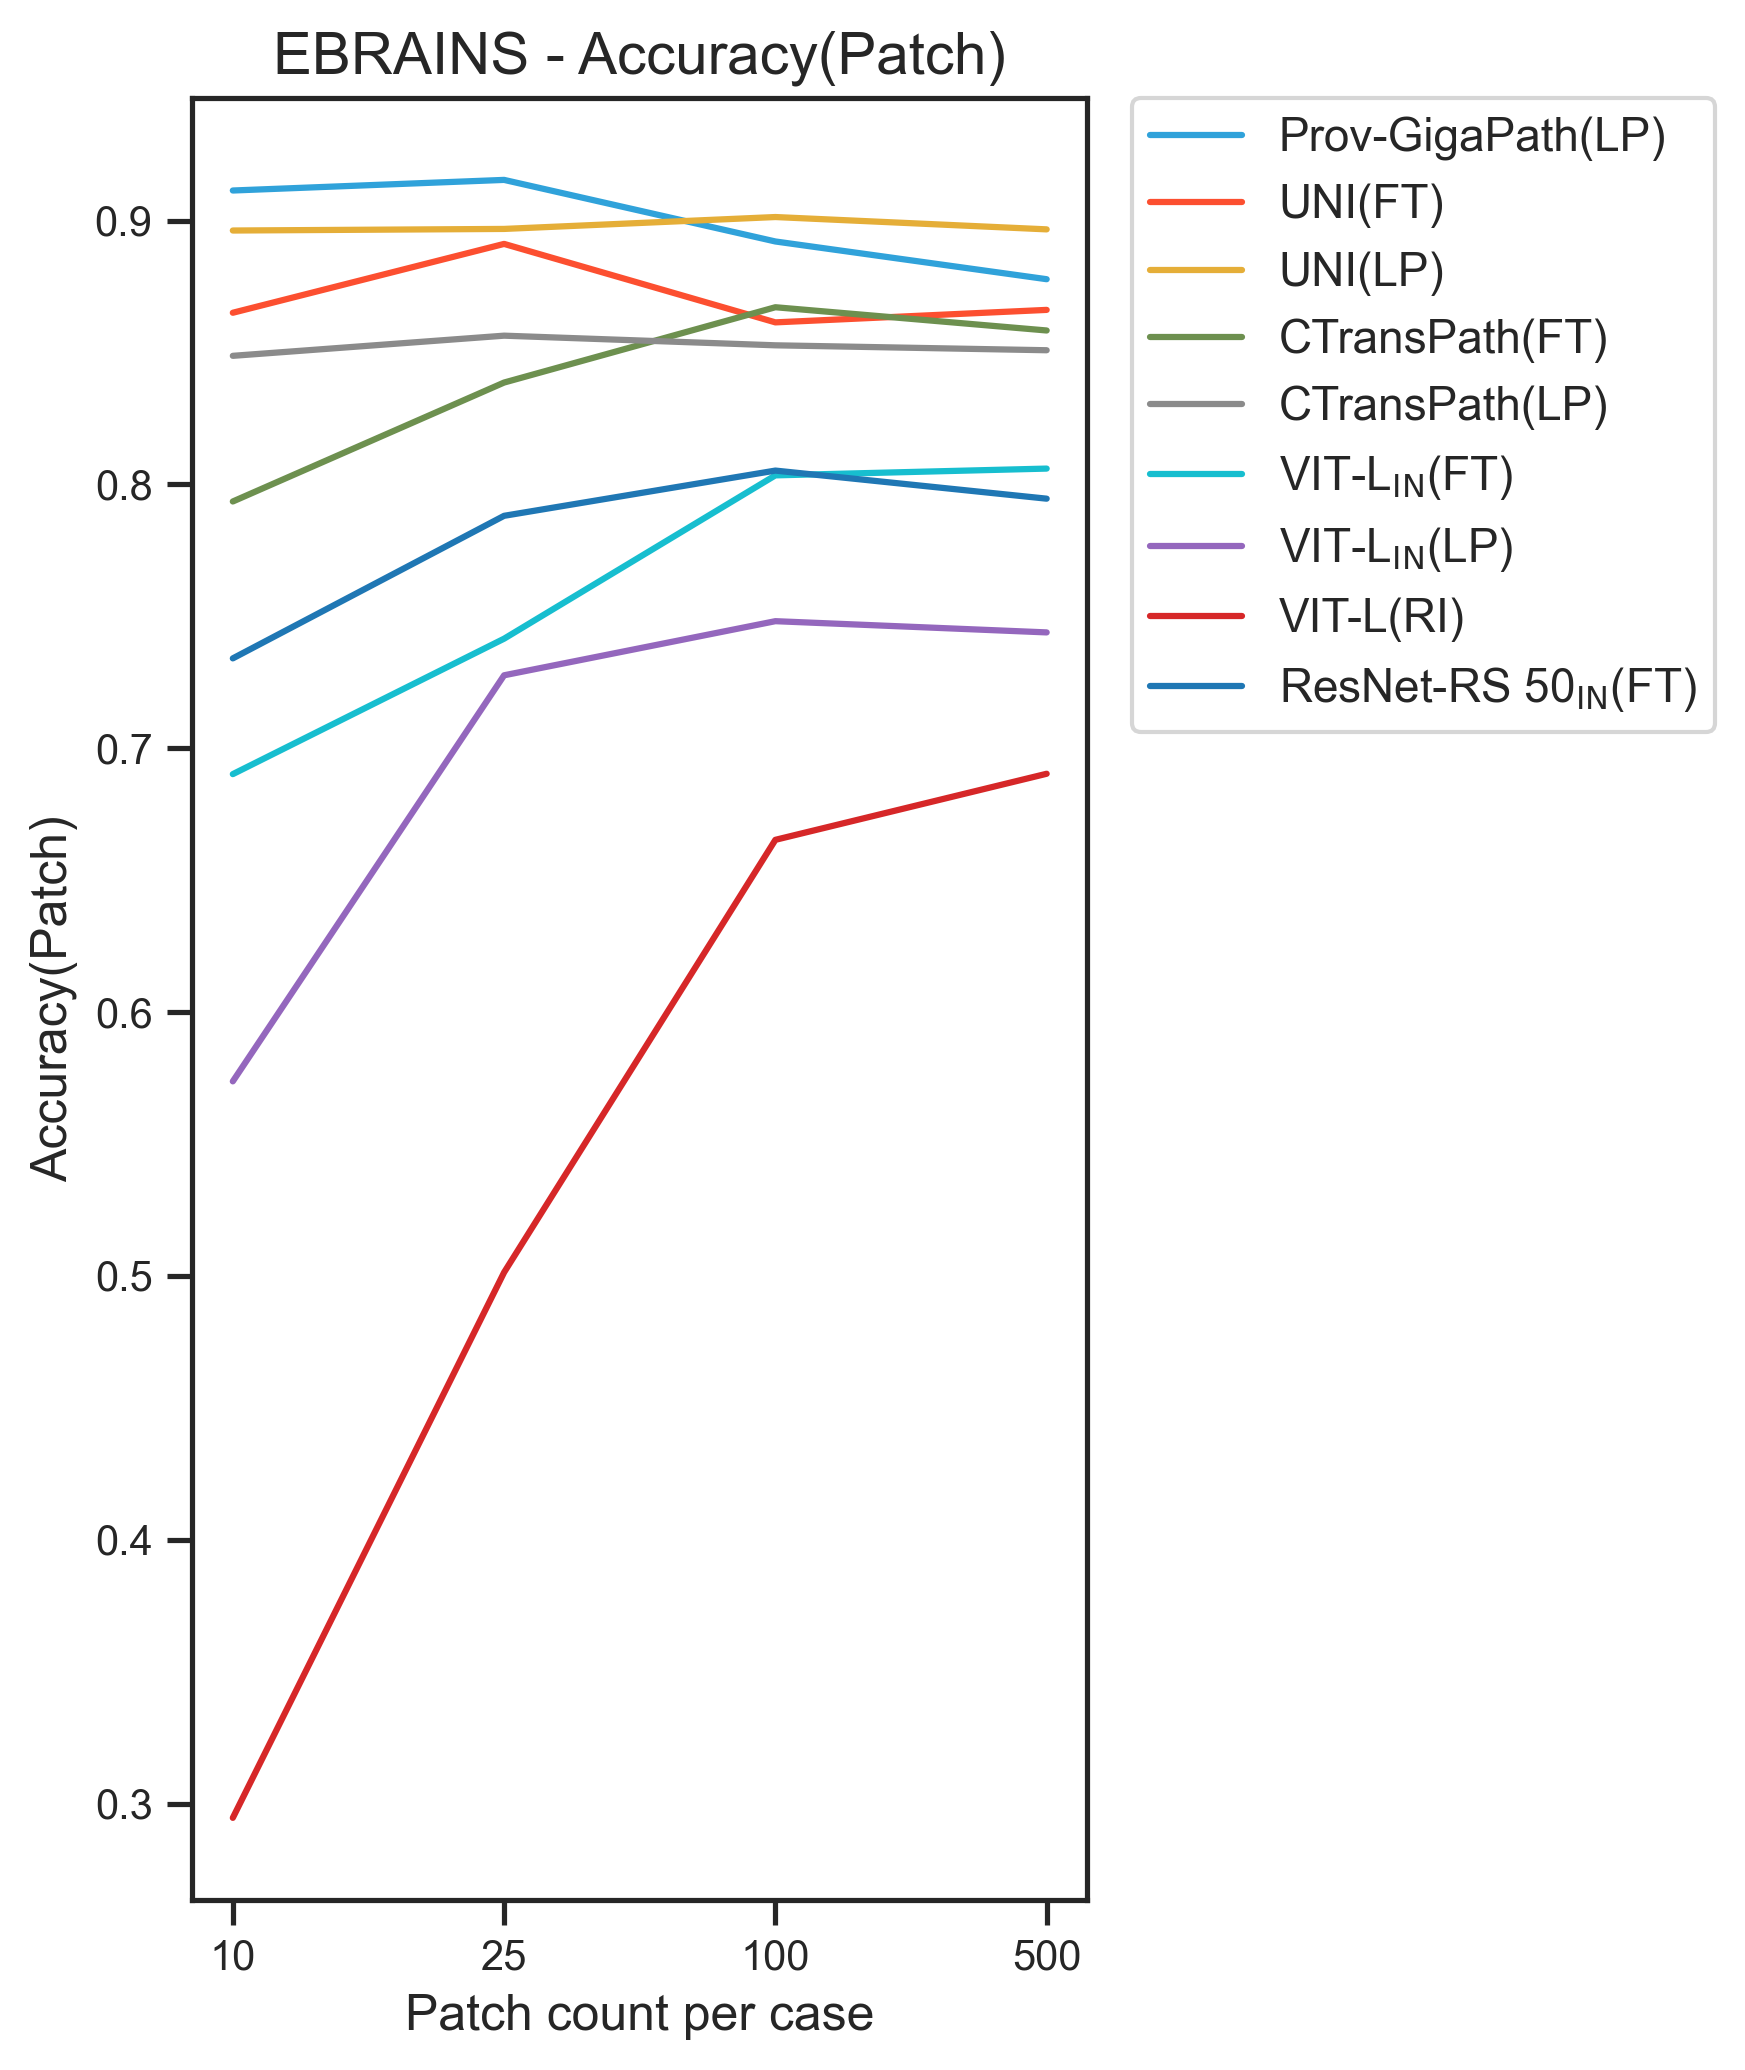

wrote out/figs/lines_ebrains_coarse_recall.png


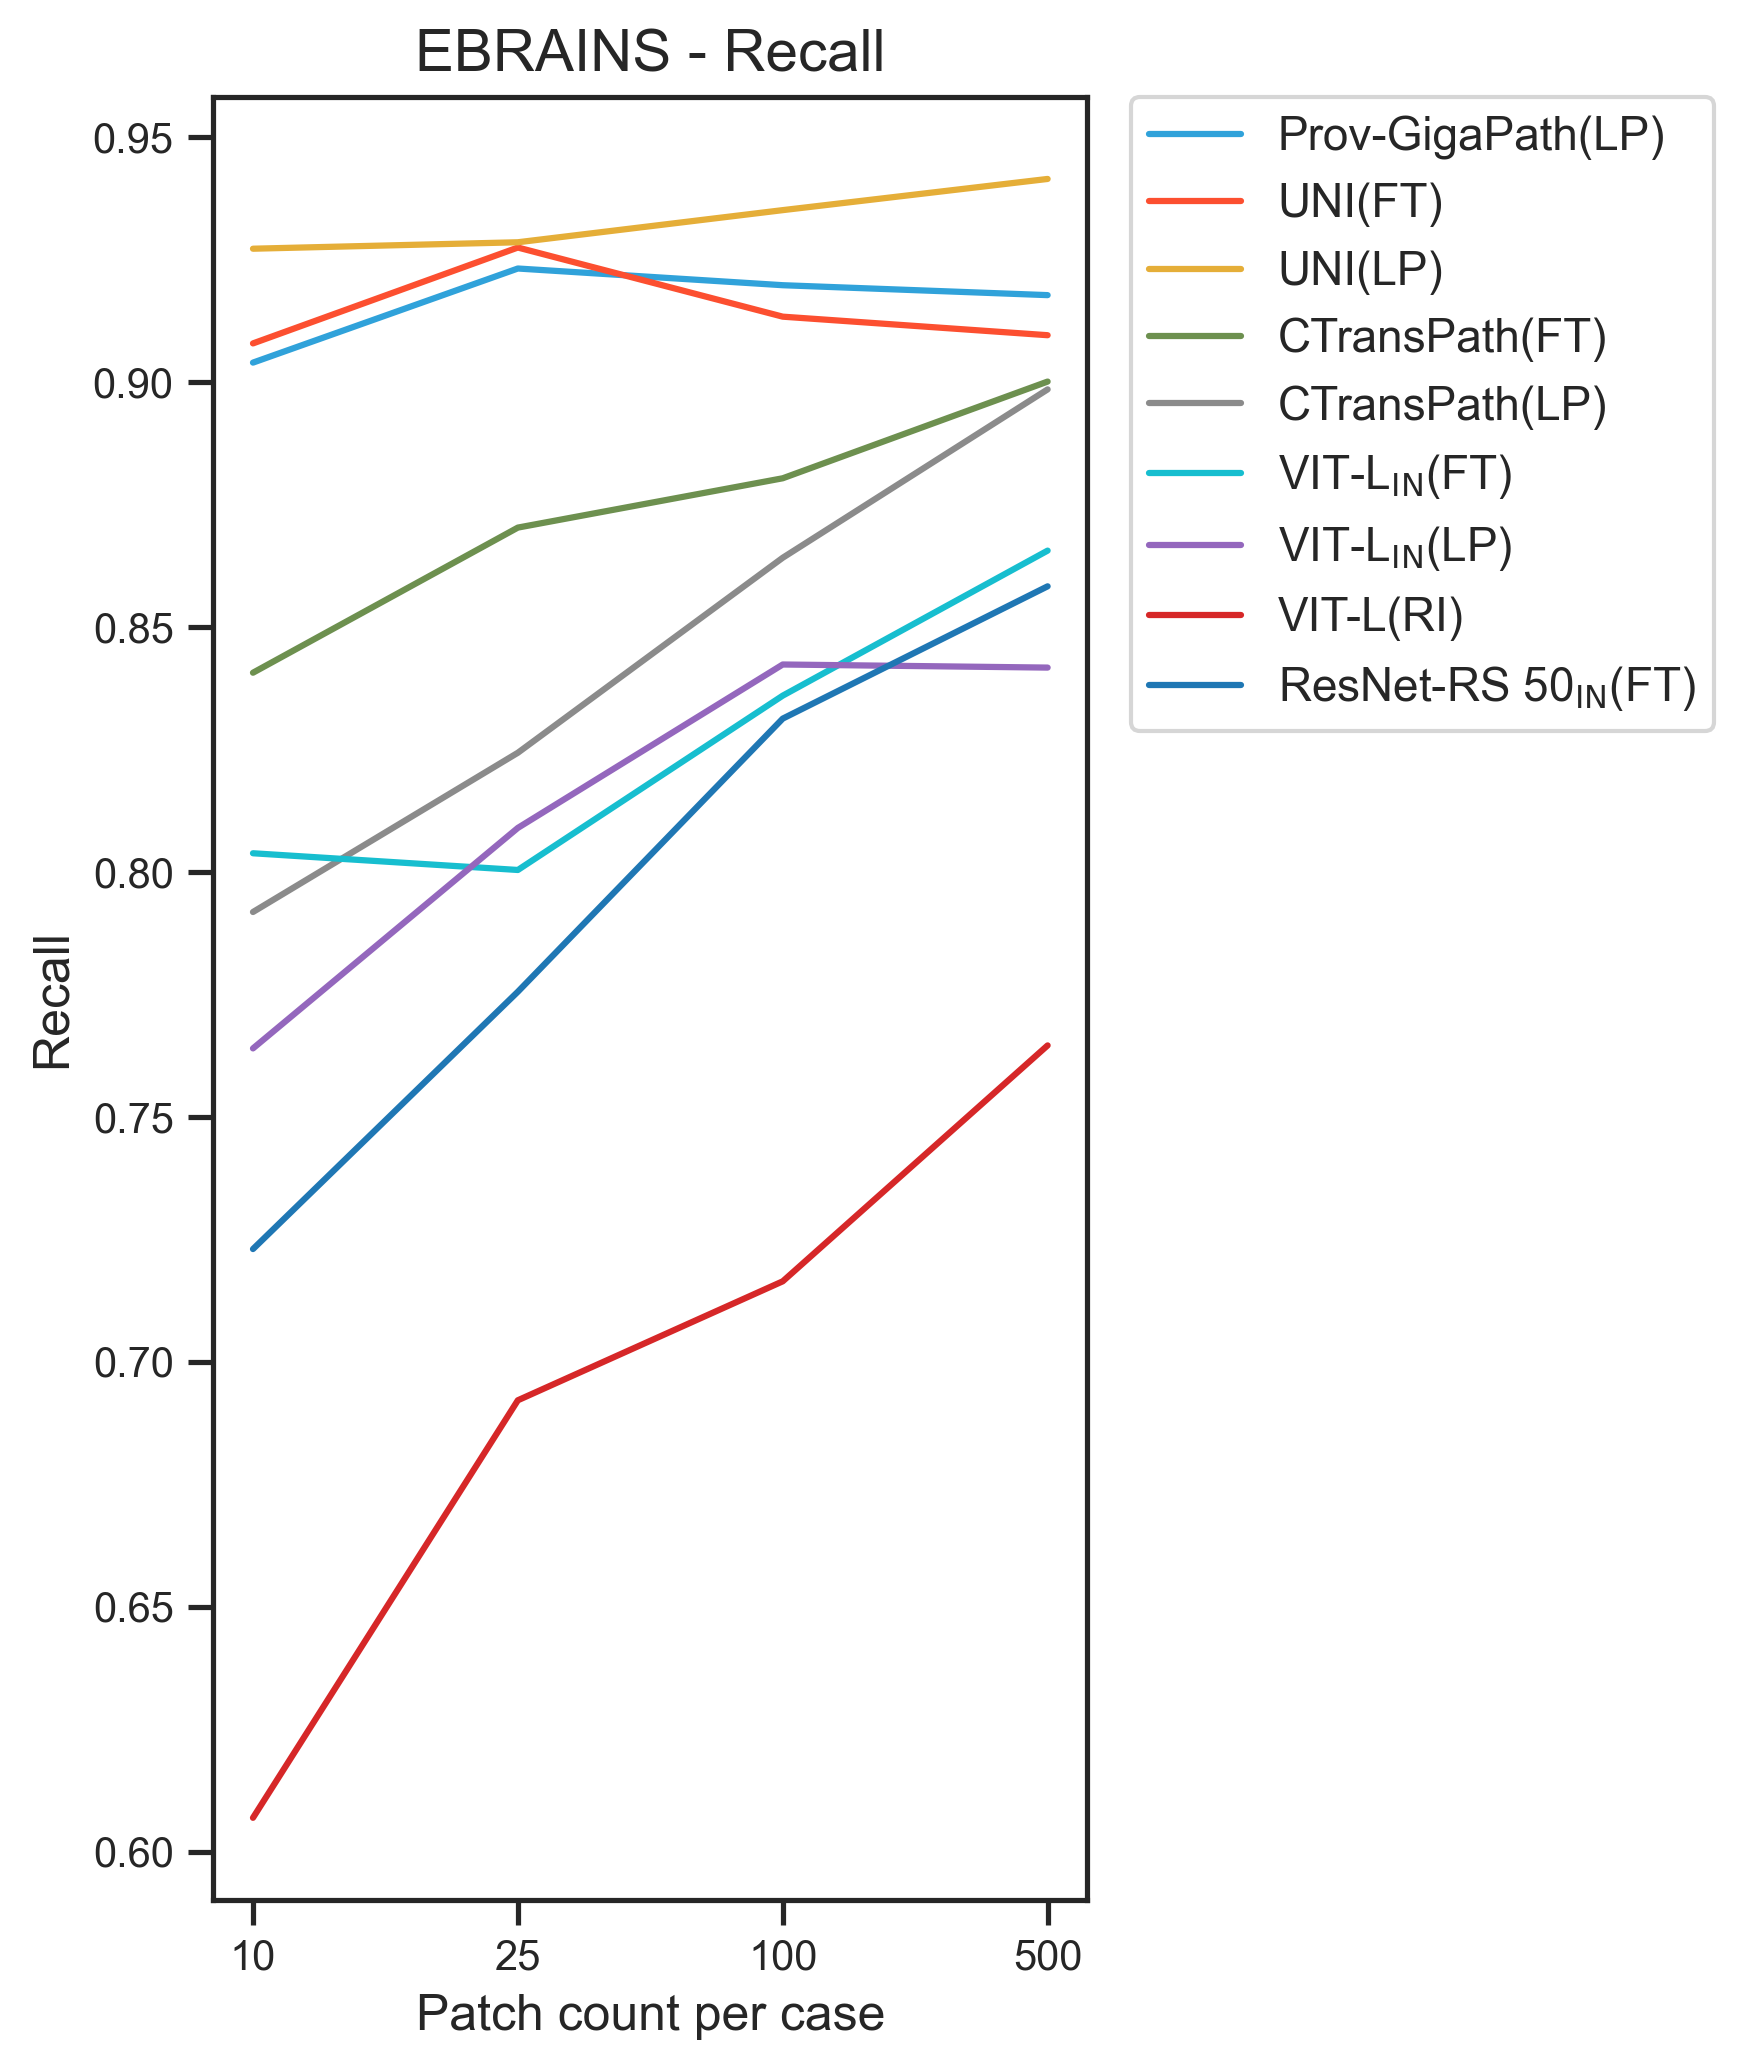

wrote out/figs/lines_ebrains_coarse_acc.png


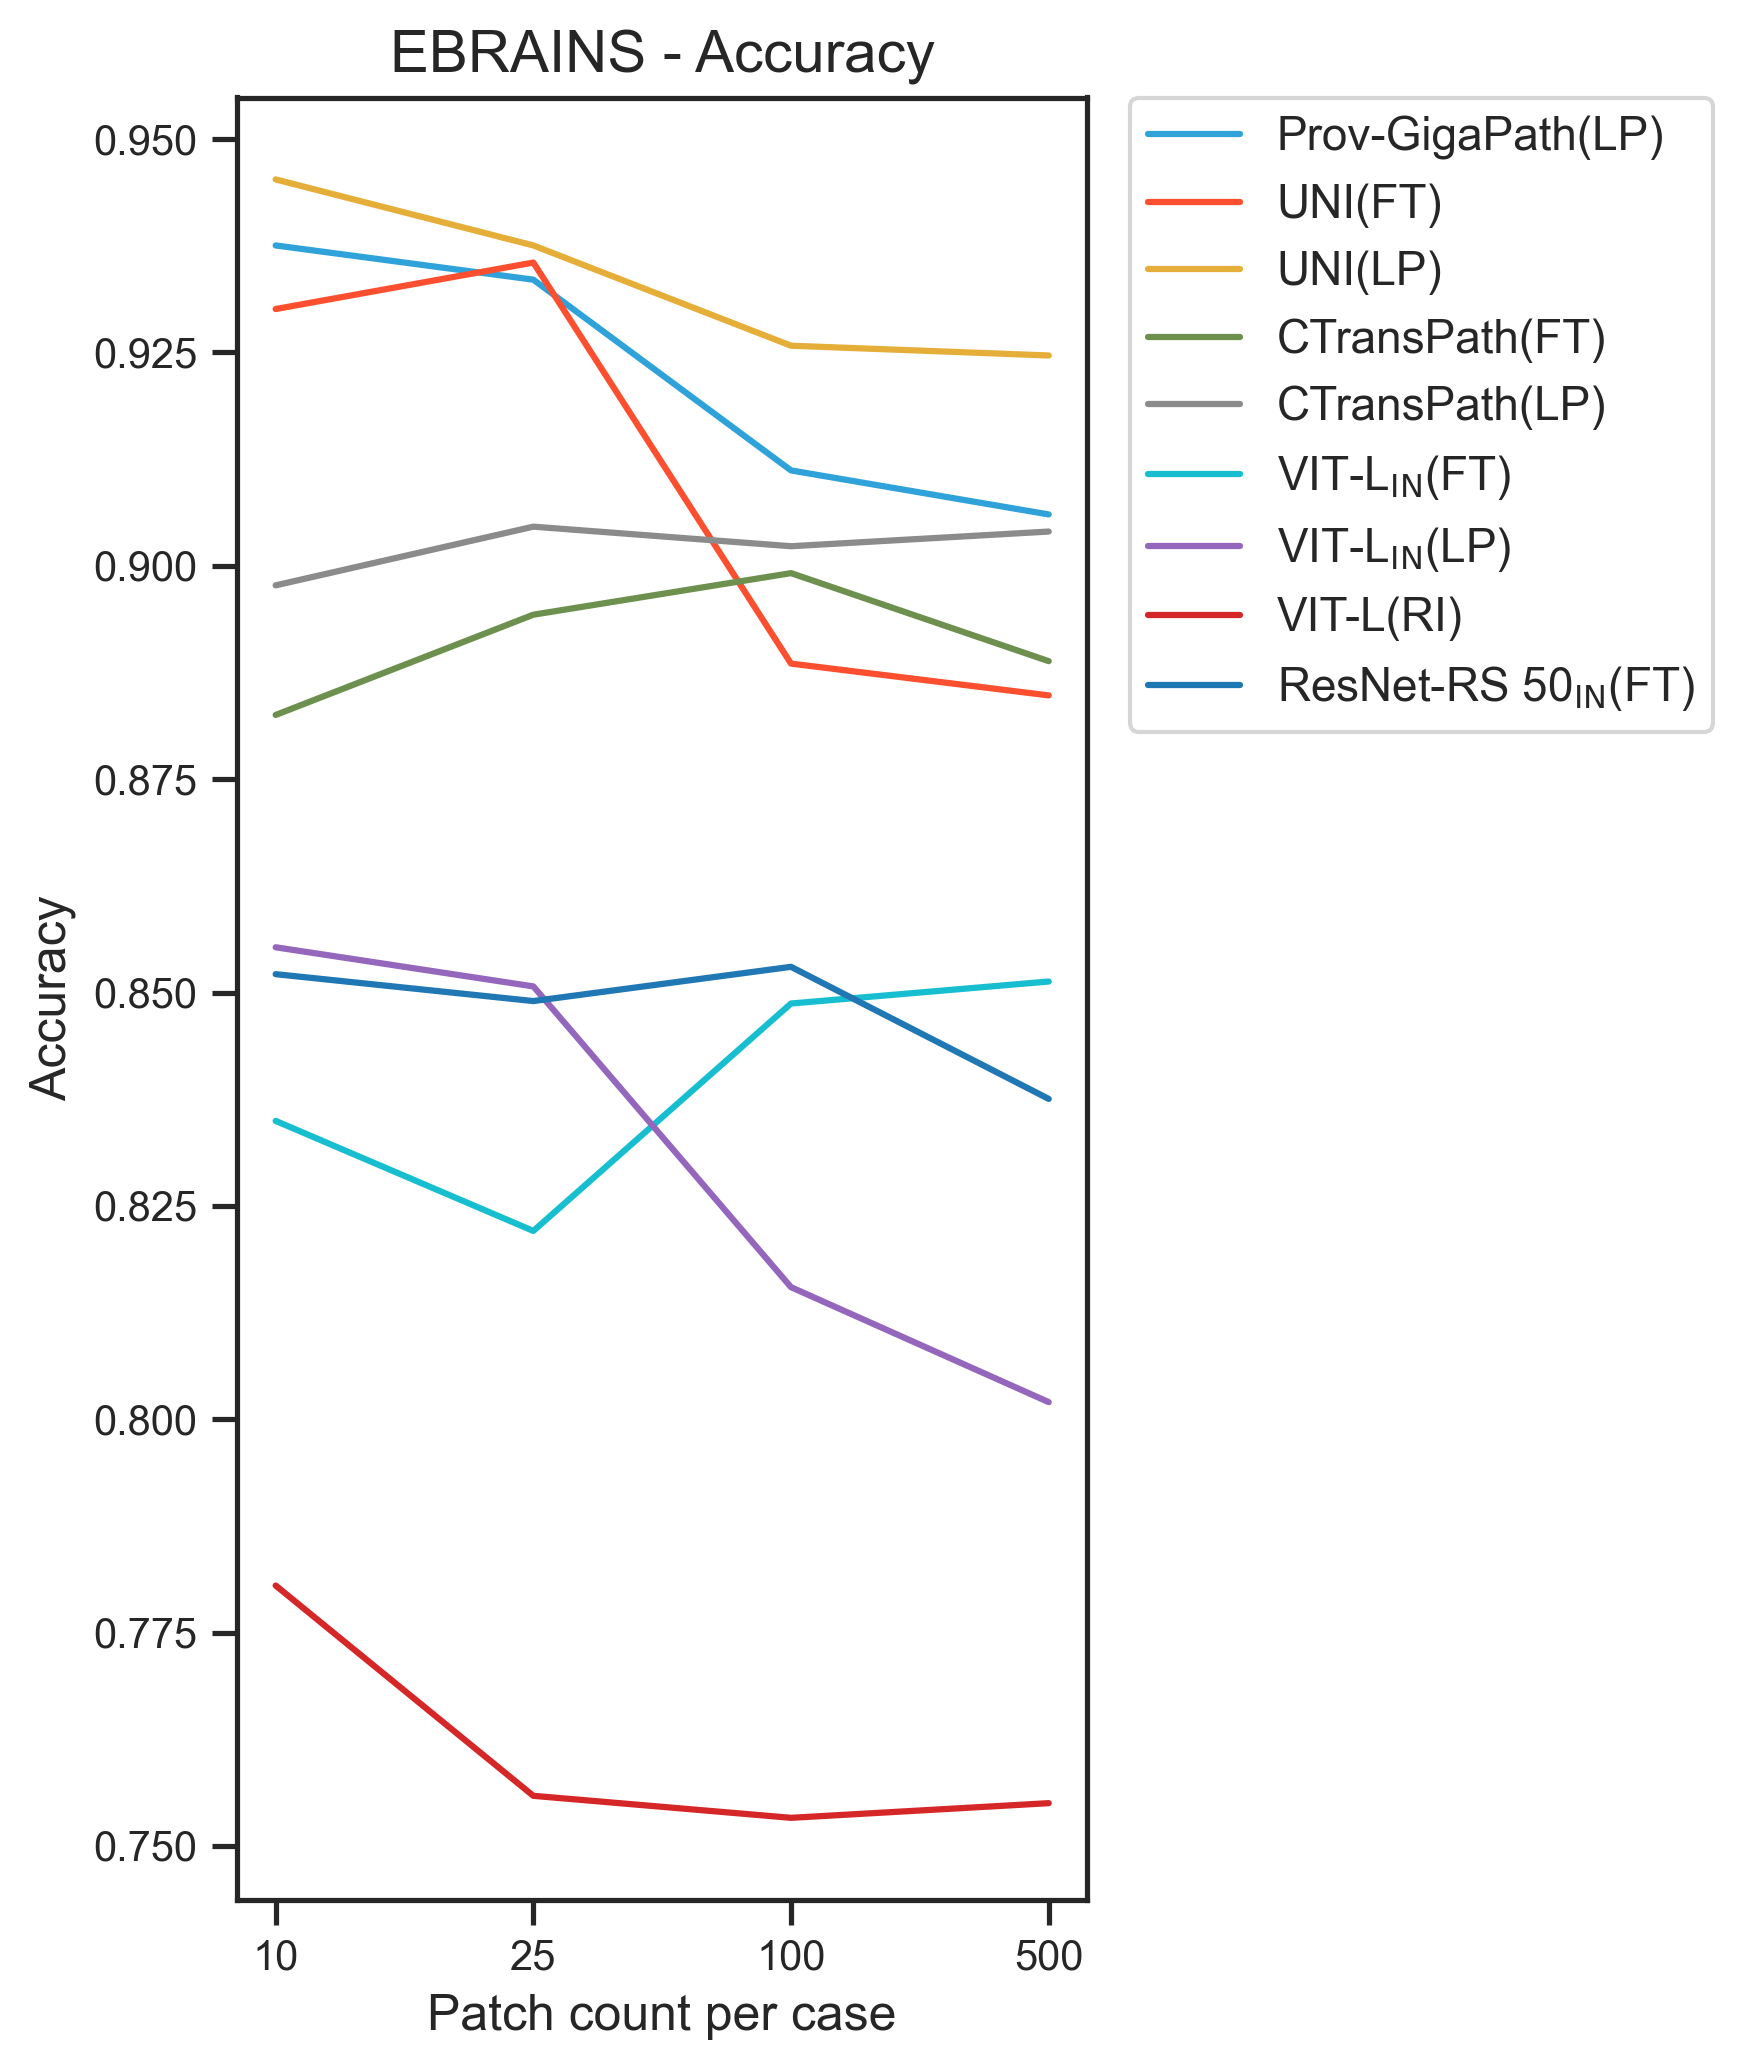

wrote out/figs/lines_ebrains_coarse_f1.png


In [18]:
draw_lines('cv', 'pacc', True, show=True)
draw_lines('cv', 'recall', True, show=True)
draw_lines('cv', 'acc', True, show=True)
draw_lines('cv', 'f1', True)

draw_lines('ebrains', 'pacc', True, show=True)
draw_lines('ebrains', 'recall', True, show=True)
draw_lines('ebrains', 'acc', True, show=True)
draw_lines('ebrains', 'f1', True)